In [57]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV, cross_val_score, cross_val_predict, train_test_split,StratifiedKFold, LeavePOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
import warnings


warnings.filterwarnings('ignore')

In [58]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [59]:
data_NZ2 = pd.read_excel('NZ2 DEGİSİMİ DATALARI-PZT5H-ICIN.xlsx')
data = data_NZ2.iloc[:, 2:4] # 2. ve 3. kolonları seçelim
data

,ynz2_18-fi-X2-izort (koordinat),ynz2_18-fi-X2-inort
0,0.0000,0.000000e+00
1,0.0625,0.000000e+00
2,0.1250,0.000000e+00
3,0.1875,0.000000e+00
4,0.2500,0.000000e+00
5,0.3125,0.000000e+00
6,0.3750,0.000000e+00
7,0.4375,0.000000e+00
8,0.5000,0.000000e+00
9,0.5625,0.000000e+00


In [60]:
data = data.loc[:175, :] # ilk 175 satırı seçelim
data['ynz2_18-fi-X2-izort (koordinat)'] = data['ynz2_18-fi-X2-izort (koordinat)'] / 10 # koordinat değerlerini / 10 yapmam gerekli
data

,ynz2_18-fi-X2-izort (koordinat),ynz2_18-fi-X2-inort
0,0.00000,0.000000e+00
1,0.00625,0.000000e+00
2,0.01250,0.000000e+00
3,0.01875,0.000000e+00
4,0.02500,0.000000e+00
5,0.03125,0.000000e+00
6,0.03750,0.000000e+00
7,0.04375,0.000000e+00
8,0.05000,0.000000e+00
9,0.05625,0.000000e+00


In [61]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [62]:
data.isna().any()

ynz2_18-fi-X2-izort (koordinat)    False
ynz2_18-fi-X2-inort                False
dtype: bool

In [63]:
data.describe()

,ynz2_18-fi-X2-izort (koordinat),ynz2_18-fi-X2-inort
count,176.000000,1.760000e+02
mean,0.500000,3.626587e-01
std,0.289612,3.955384e-01
min,0.000000,-1.266083e-08
25%,0.250000,0.000000e+00
50%,0.500000,0.000000e+00
75%,0.750000,8.155782e-01
max,1.000000,8.565972e-01


In [64]:
data.shape

(176, 2)

### veri kontrol edildi, düzeltildi, problem yok 

In [65]:
X = data.iloc[:, :1].values
y = data.iloc[:,1].values

In [66]:
X.shape, y.shape

((176, 1), (176,))

In [67]:
print(data["ynz2_18-fi-X2-izort (koordinat)"])

0      0.00000
1      0.00625
2      0.01250
3      0.01875
4      0.02500
5      0.03125
6      0.03750
7      0.04375
8      0.05000
9      0.05625
10     0.06250
11     0.06250
12     0.06875
13     0.07500
14     0.08125
15     0.08750
16     0.09375
17     0.10000
18     0.10625
19     0.11250
20     0.11875
21     0.12500
22     0.12500
23     0.13125
24     0.13750
25     0.14375
26     0.15000
27     0.15625
28     0.16250
29     0.16875
30     0.17500
31     0.18125
32     0.18750
33     0.18750
34     0.19375
35     0.20000
36     0.20625
37     0.21250
38     0.21875
39     0.22500
40     0.23125
41     0.23750
42     0.24375
43     0.25000
44     0.25000
45     0.25625
46     0.26250
47     0.26875
48     0.27500
49     0.28125
50     0.28750
51     0.29375
52     0.30000
53     0.30625
54     0.31250
55     0.31250
56     0.31875
57     0.32500
58     0.33125
59     0.33750
60     0.34375
61     0.35000
62     0.35625
63     0.36250
64     0.36875
65     0.37500
66     0.3

In [68]:
print(X.tolist())

[[0.0], [0.0062500000931322505], [0.012500000186264501], [0.0187500002793968], [0.025000000372529002], [0.0312500004656613], [0.0375000005587936], [0.0437500006519258], [0.0500000007450581], [0.056250000838190296], [0.0625000009313226], [0.0625], [0.0687500000931323], [0.0750000001862645], [0.0812500002793968], [0.087500000372529], [0.0937500004656613], [0.10000000055879402], [0.106250000651926], [0.11250000074505799], [0.11875000083819001], [0.125000000931323], [0.125], [0.13125000009313198], [0.13750000018626501], [0.143750000279397], [0.150000000372529], [0.156250000465661], [0.16250000055879402], [0.168750000651926], [0.175000000745058], [0.18125000083819], [0.187500000931323], [0.1875], [0.19375000009313198], [0.20000000018626501], [0.206250000279397], [0.21250000037252897], [0.218750000465661], [0.225000000558794], [0.23125000065192597], [0.237500000745058], [0.24375000083819], [0.250000000931323], [0.25], [0.256250000093132], [0.262500000186265], [0.268750000279397], [0.27500000

In [69]:
X_test.tolist()

[[0.011250000074505799],
 [0.025625000009313198],
 [0.0793750000651926],
 [0.0175000000745058],
 [0.0381250000093132],
 [0.009375000046566129],
 [0.068125000083819],
 [0.09812500006519259],
 [0.06250000009313221],
 [0.0800000000745058],
 [0.0137500000186265],
 [0.09125000005587941],
 [0.0237500000745058],
 [0.0675000000745058],
 [0.0087500000372529],
 [0.0631250000093132],
 [0.06437500002793971],
 [0.046875000046566105],
 [0.00562500008381903],
 [0.0650000000372529],
 [0.0106250000651926],
 [0.0375],
 [0.0343750000465661],
 [0.0950000000186265],
 [0.0962500000372529],
 [0.0856250000651926],
 [0.06687500006519259],
 [0.0375000000931323],
 [0.051250000018626396],
 [0.03125],
 [0.0168750000651926],
 [0.0725000000558794],
 [0.0818750000093132],
 [0.018125000083819],
 [0.00687500000931323],
 [0.024375000083819],
 [0.0887500000186265],
 [0.07750000003725291],
 [0.0562500000931323],
 [0.08937500002793969],
 [0.021875000046566104],
 [0.06187500008381899],
 [0.0487500000745058],
 [0.03875000001

In [70]:
X_train.tolist()

[[0.0812500000931323],
 [0.00125000001862645],
 [0.0568750000093132],
 [0.0693750000093132],
 [0.08750000009313229],
 [0.0293750000651926],
 [0.043750000093132305],
 [0.0318750000093132],
 [0.015000000037252902],
 [0.086875000083819],
 [0.0731250000651926],
 [0.0593750000465661],
 [0.0443750000093132],
 [0.0206250000279397],
 [0.053125000046566104],
 [0.0125],
 [0.08250000001862651],
 [0.055625000083818994],
 [0.0393750000279397],
 [0.09375],
 [0.00625],
 [0.00375000005587936],
 [0.015625000046566098],
 [0.08125],
 [0.0025000000372529],
 [0.0187500000931323],
 [0.0543750000651926],
 [0.0956250000279397],
 [0.043125000083819],
 [0.00625000009313226],
 [0.0831250000279397],
 [0.0700000000186264],
 [0.0],
 [0.0756250000093132],
 [0.0712500000372529],
 [0.036875000083819],
 [0.025],
 [0.0550000000745058],
 [0.016250000055879402],
 [0.023125000065192598],
 [0.0718750000465661],
 [0.0143750000279397],
 [0.013125000009313199],
 [0.0781250000465661],
 [0.0462500000372529],
 [0.0450000000186264

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### RandomForestRegressor deneyelim

[[ 0.00e+00  0.00e+00]
 [ 2.81e-02  8.57e-02]
 [-4.03e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 8.32e-01  8.30e-01]
 [ 0.00e+00  0.00e+00]
 [ 8.39e-01  8.47e-01]
 [-4.03e-10  0.00e+00]
 [ 8.26e-01  8.27e-01]
 [-4.03e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [-4.03e-10  0.00e+00]
 [ 1.03e-03  0.00e+00]
 [ 8.42e-01  8.45e-01]
 [ 0.00e+00  0.00e+00]
 [ 8.30e-01  8.29e-01]
 [ 8.32e-01  8.34e-01]
 [ 8.13e-01  8.13e-01]
 [ 0.00e+00  0.00e+00]
 [ 8.36e-01  8.36e-01]
 [ 0.00e+00  0.00e+00]
 [ 8.35e-01  8.31e-01]
 [ 8.45e-01  8.44e-01]
 [-4.03e-10  0.00e+00]
 [-4.03e-10  0.00e+00]
 [-4.03e-10  0.00e+00]
 [ 8.40e-01  8.43e-01]
 [ 8.35e-01  8.31e-01]
 [ 8.10e-01  8.10e-01]
 [ 8.30e-01  8.57e-01]
 [ 0.00e+00  0.00e+00]
 [ 2.95e-01  3.40e-01]
 [-4.03e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 6.17e-03  0.00e+00]
 [-4.03e-10  0.00e+00]
 [-4.03e-10  0.00e+00]
 [ 8.13e-01  8.13e-01]
 [-4.03e-10  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 8.24e-01  8.25e-01]
 [ 8.10e-01  8.11e-01]
 [ 8.26e-01

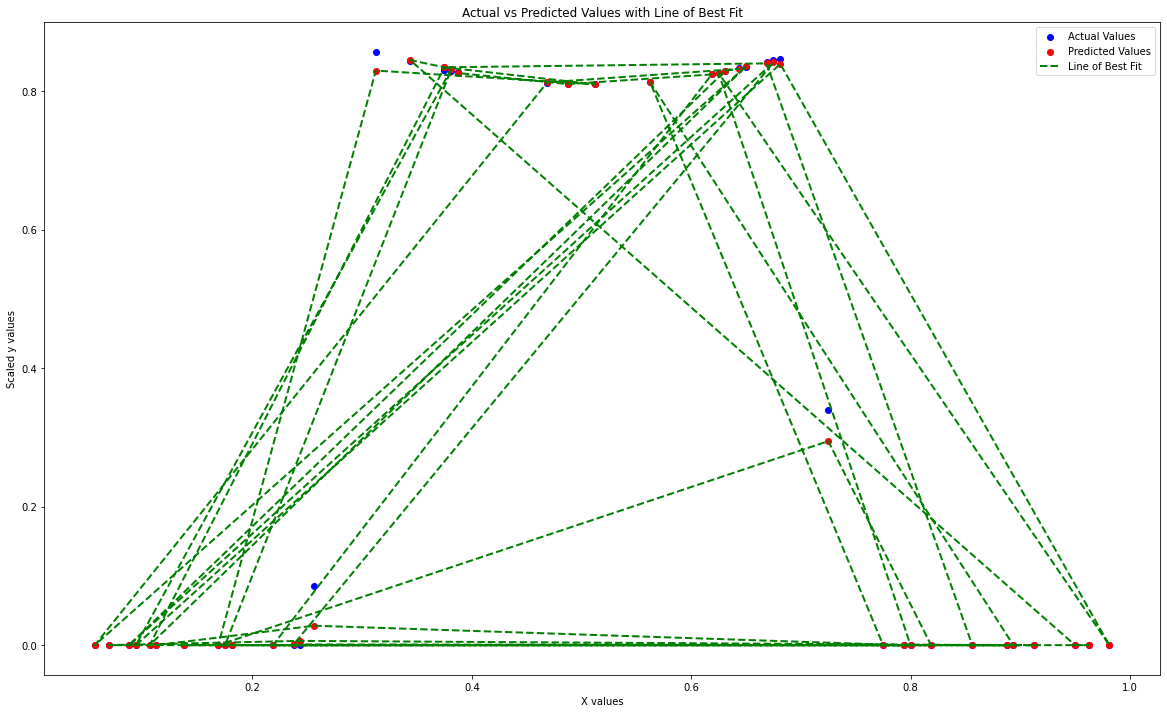

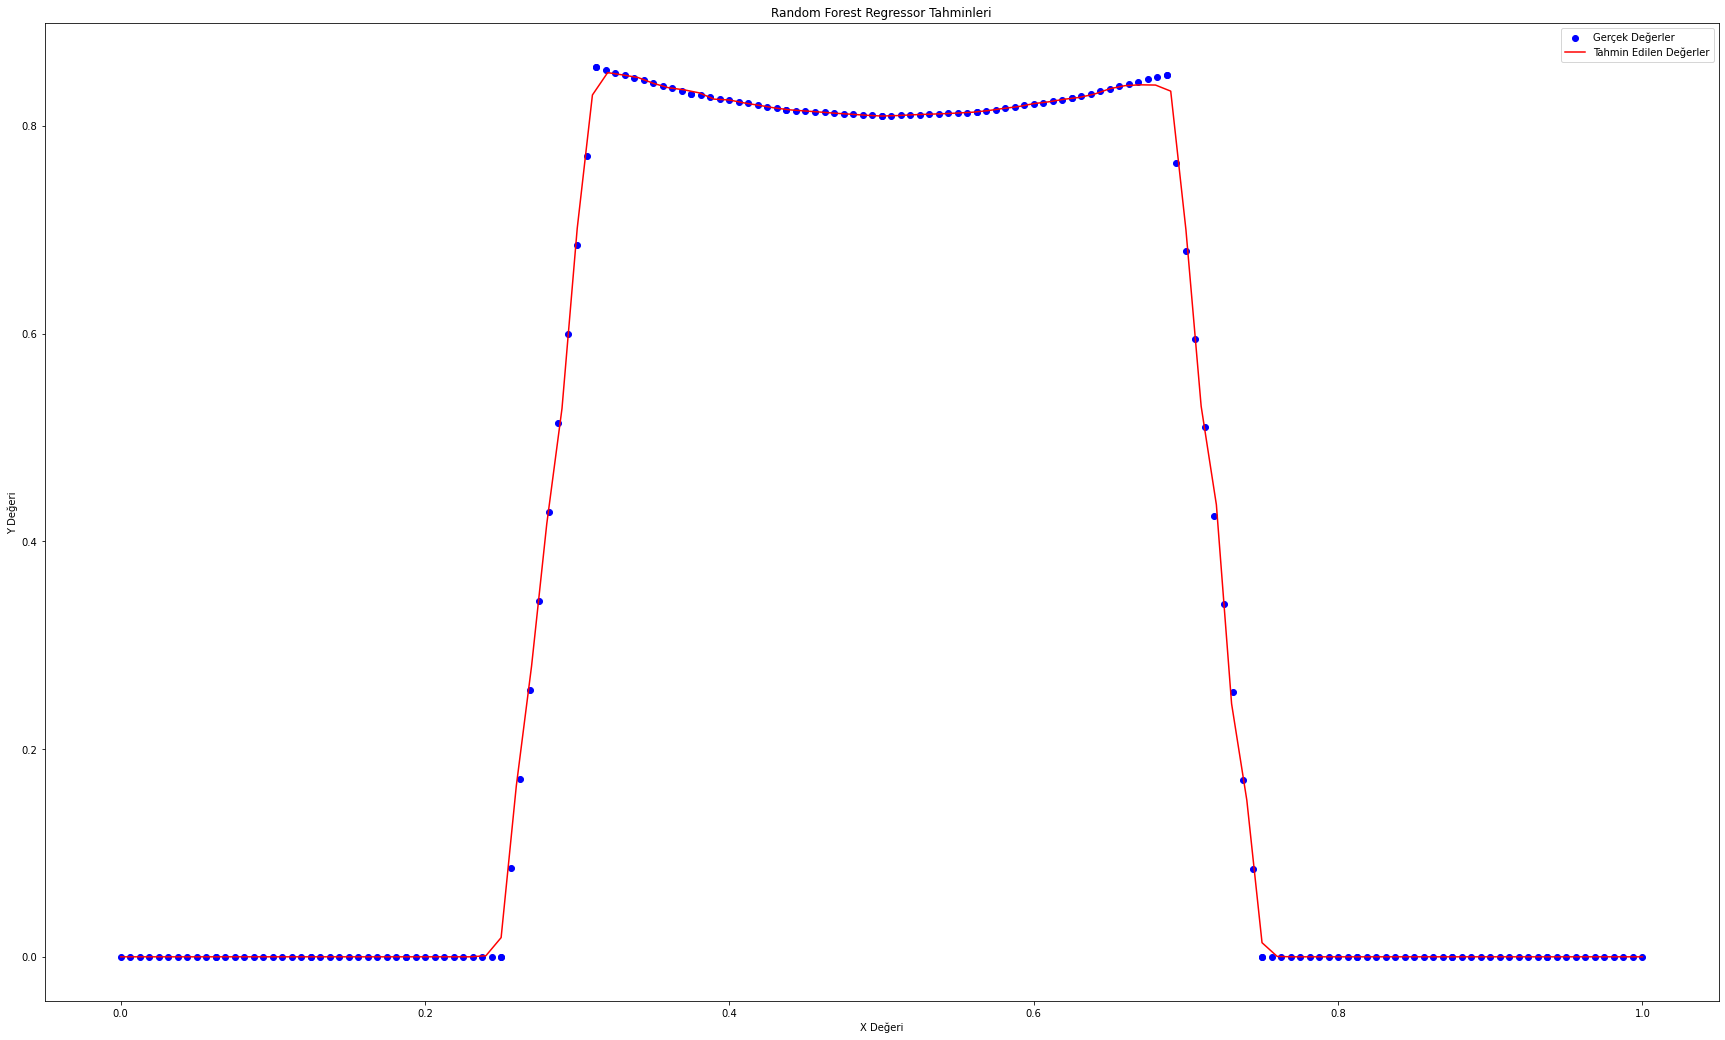

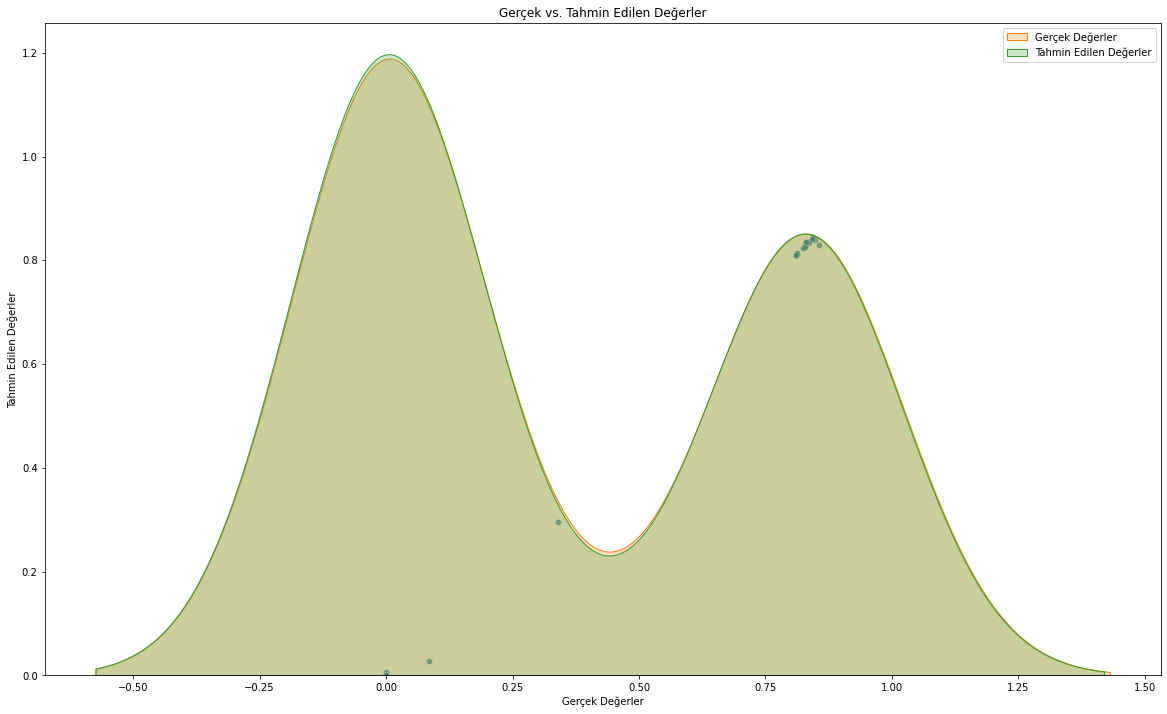

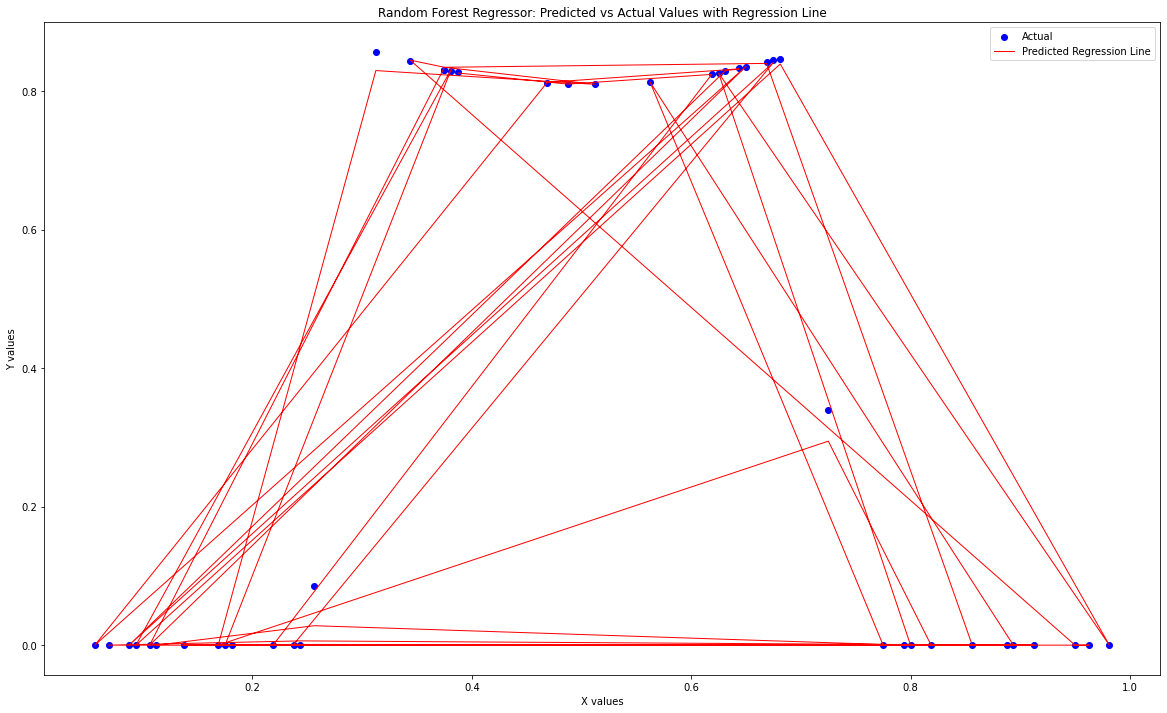

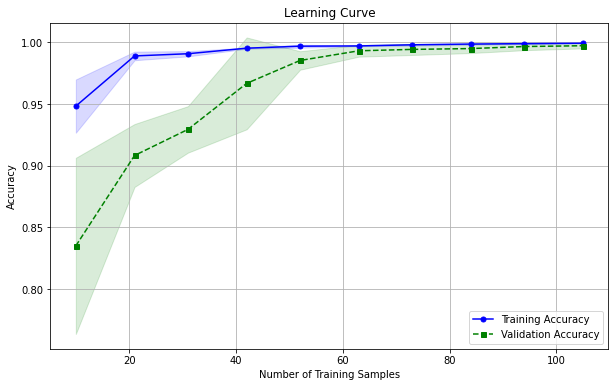

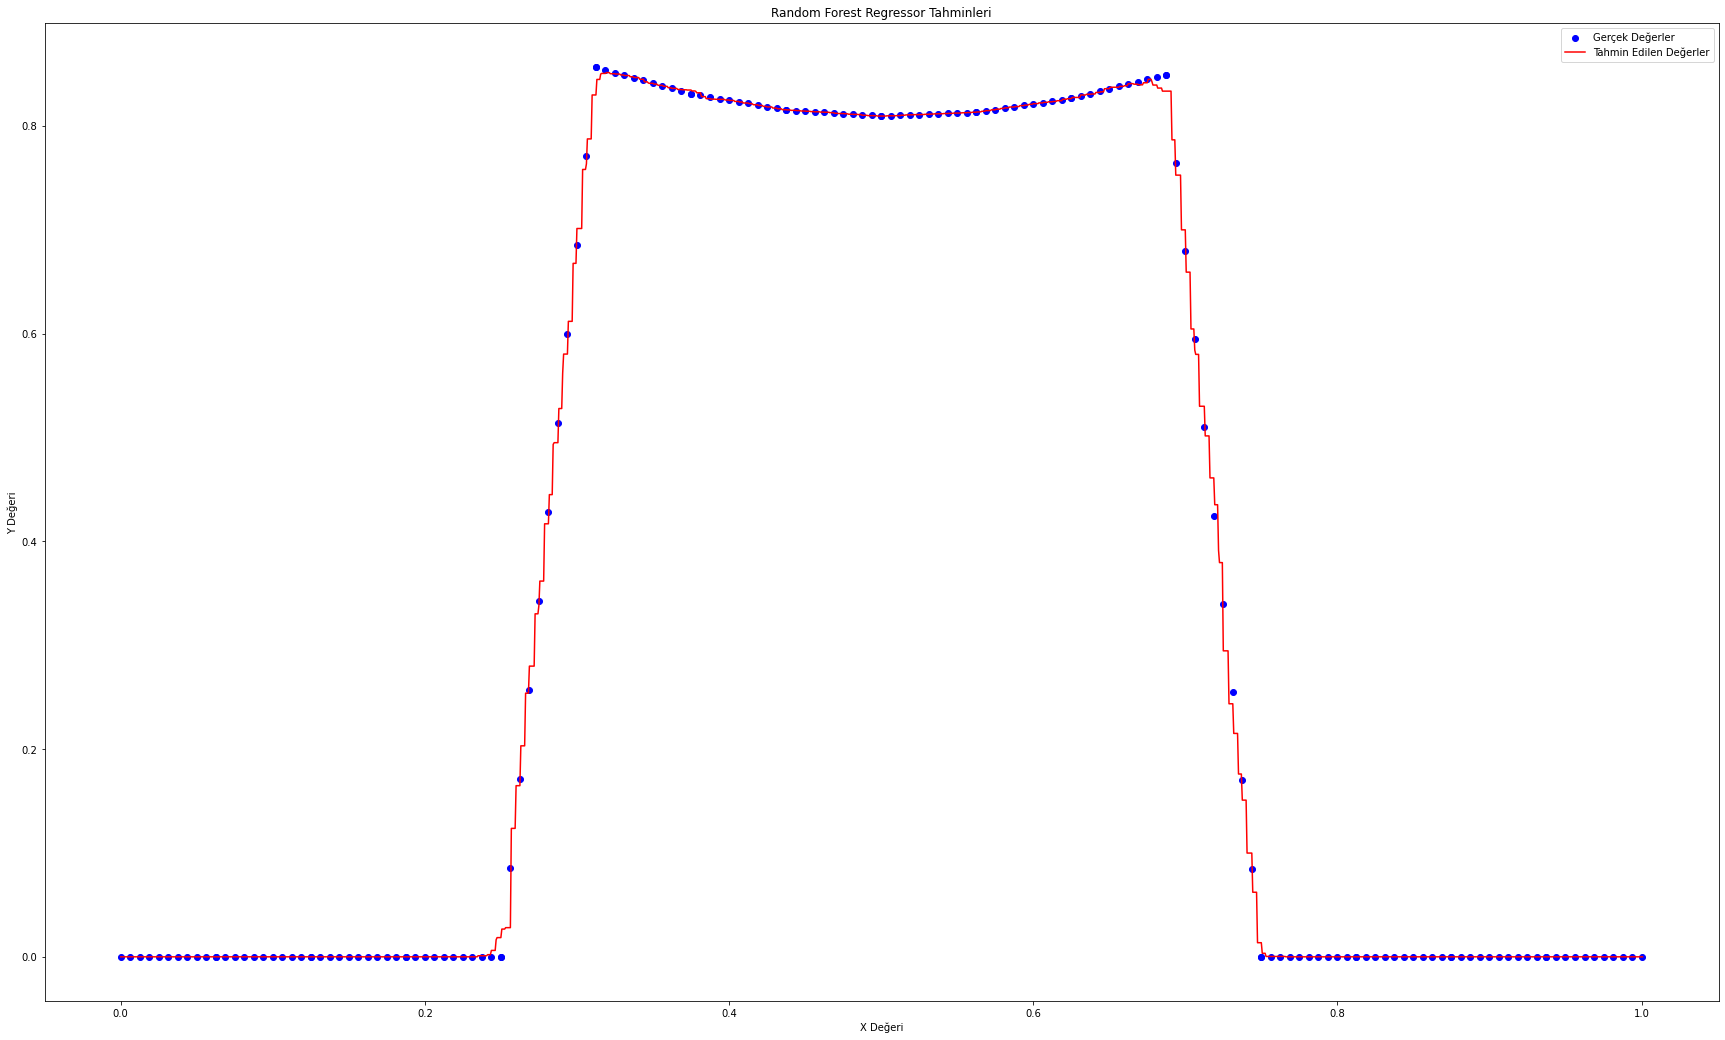

[0.82]


In [72]:
rf_reg = RandomForestRegressor(n_estimators = 250 , criterion='squared_error',random_state = 42) 
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = rf_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", rf_reg.score(X,y))

plt.figure(figsize=(20, 12))

# Scatter plot for predicted vs actual values
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')

# Line plot to connect predicted and actual values
plt.plot(X_test, y_pred, color='green', linestyle='dashed', linewidth=2, label='Line of Best Fit')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Scaled y values')
plt.title('Actual vs Predicted Values with Line of Best Fit')

# Adding legend
plt.legend()

# Show the plot
plt.show()



# Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.000625, 0.000625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = rf_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = rf_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Random Forest Regressor Tahminleri')
plt.legend()
plt.show()



# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Random Forest Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rf_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()

### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.000625, 0.000625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = rf_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = rf_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Random Forest Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(rf_reg.predict([[0.43125]])) #0.43125     8.171448e-01 gerçek değerde

### XGBRegressor ile deneyelim

[[8.03e-04 0.00e+00]
 [1.72e-01 8.57e-02]
 [8.09e-04 0.00e+00]
 [8.03e-04 0.00e+00]
 [8.33e-01 8.30e-01]
 [8.03e-04 0.00e+00]
 [8.46e-01 8.47e-01]
 [8.09e-04 0.00e+00]
 [8.26e-01 8.27e-01]
 [8.09e-04 0.00e+00]
 [8.03e-04 0.00e+00]
 [8.09e-04 0.00e+00]
 [8.03e-04 0.00e+00]
 [8.46e-01 8.45e-01]
 [8.03e-04 0.00e+00]
 [8.30e-01 8.29e-01]
 [8.30e-01 8.34e-01]
 [8.12e-01 8.13e-01]
 [8.03e-04 0.00e+00]
 [8.37e-01 8.36e-01]
 [8.03e-04 0.00e+00]
 [8.33e-01 8.31e-01]
 [8.41e-01 8.44e-01]
 [8.09e-04 0.00e+00]
 [8.09e-04 0.00e+00]
 [8.09e-04 0.00e+00]
 [8.39e-01 8.43e-01]
 [8.33e-01 8.31e-01]
 [8.10e-01 8.10e-01]
 [8.52e-01 8.57e-01]
 [8.03e-04 0.00e+00]
 [2.55e-01 3.40e-01]
 [8.09e-04 0.00e+00]
 [8.03e-04 0.00e+00]
 [8.03e-04 0.00e+00]
 [8.03e-04 0.00e+00]
 [8.09e-04 0.00e+00]
 [8.09e-04 0.00e+00]
 [8.13e-01 8.13e-01]
 [8.09e-04 0.00e+00]
 [8.03e-04 0.00e+00]
 [8.26e-01 8.25e-01]
 [8.10e-01 8.11e-01]
 [8.26e-01 8.28e-01]]
0.9979518080497453
TEST SET
MAE:                 0.0018477819648335051
RMSE

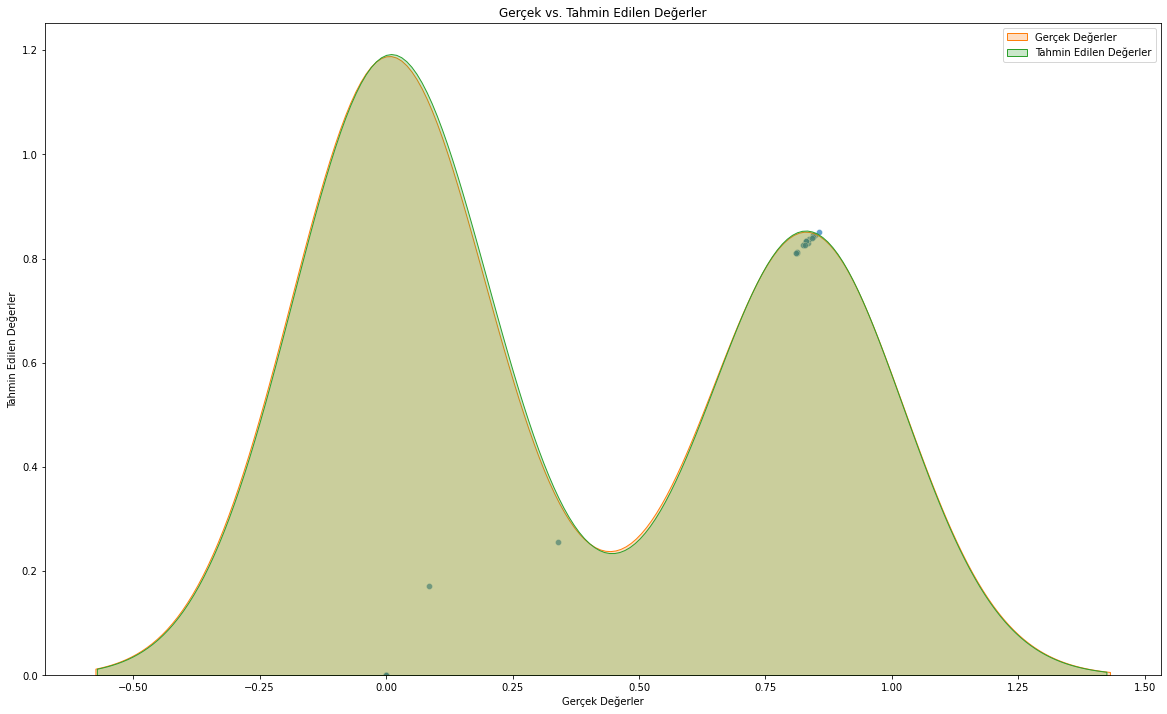

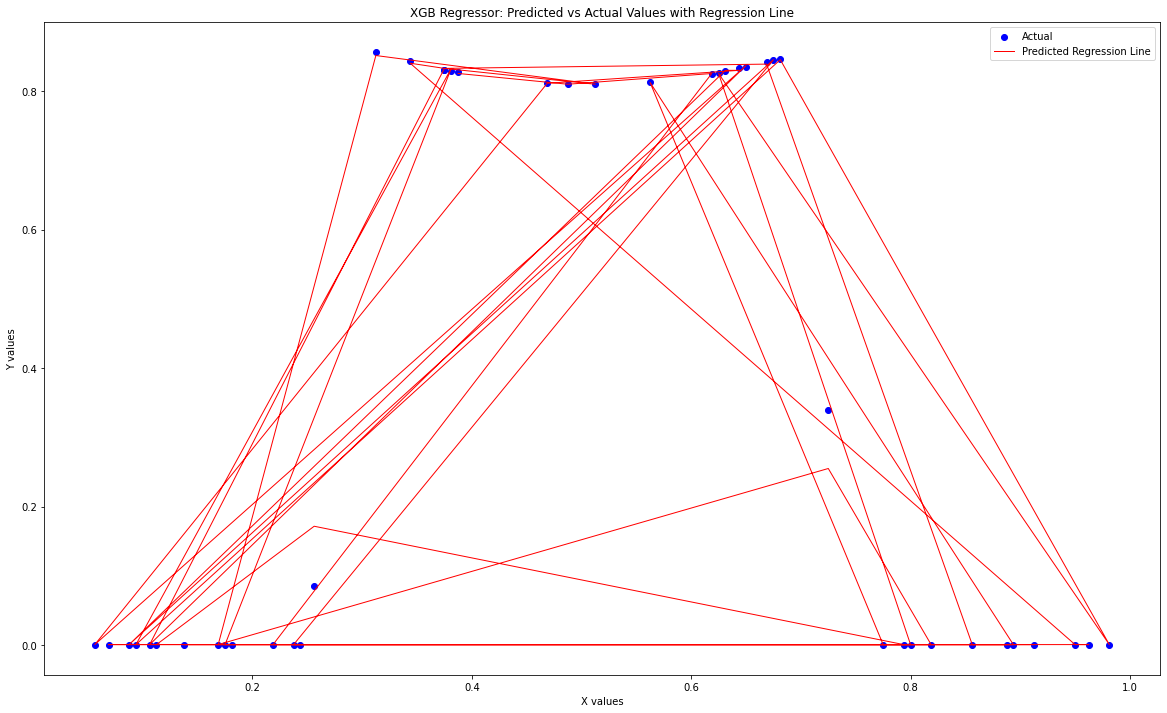

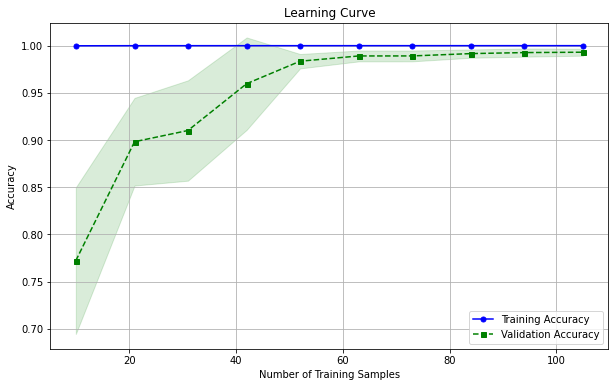

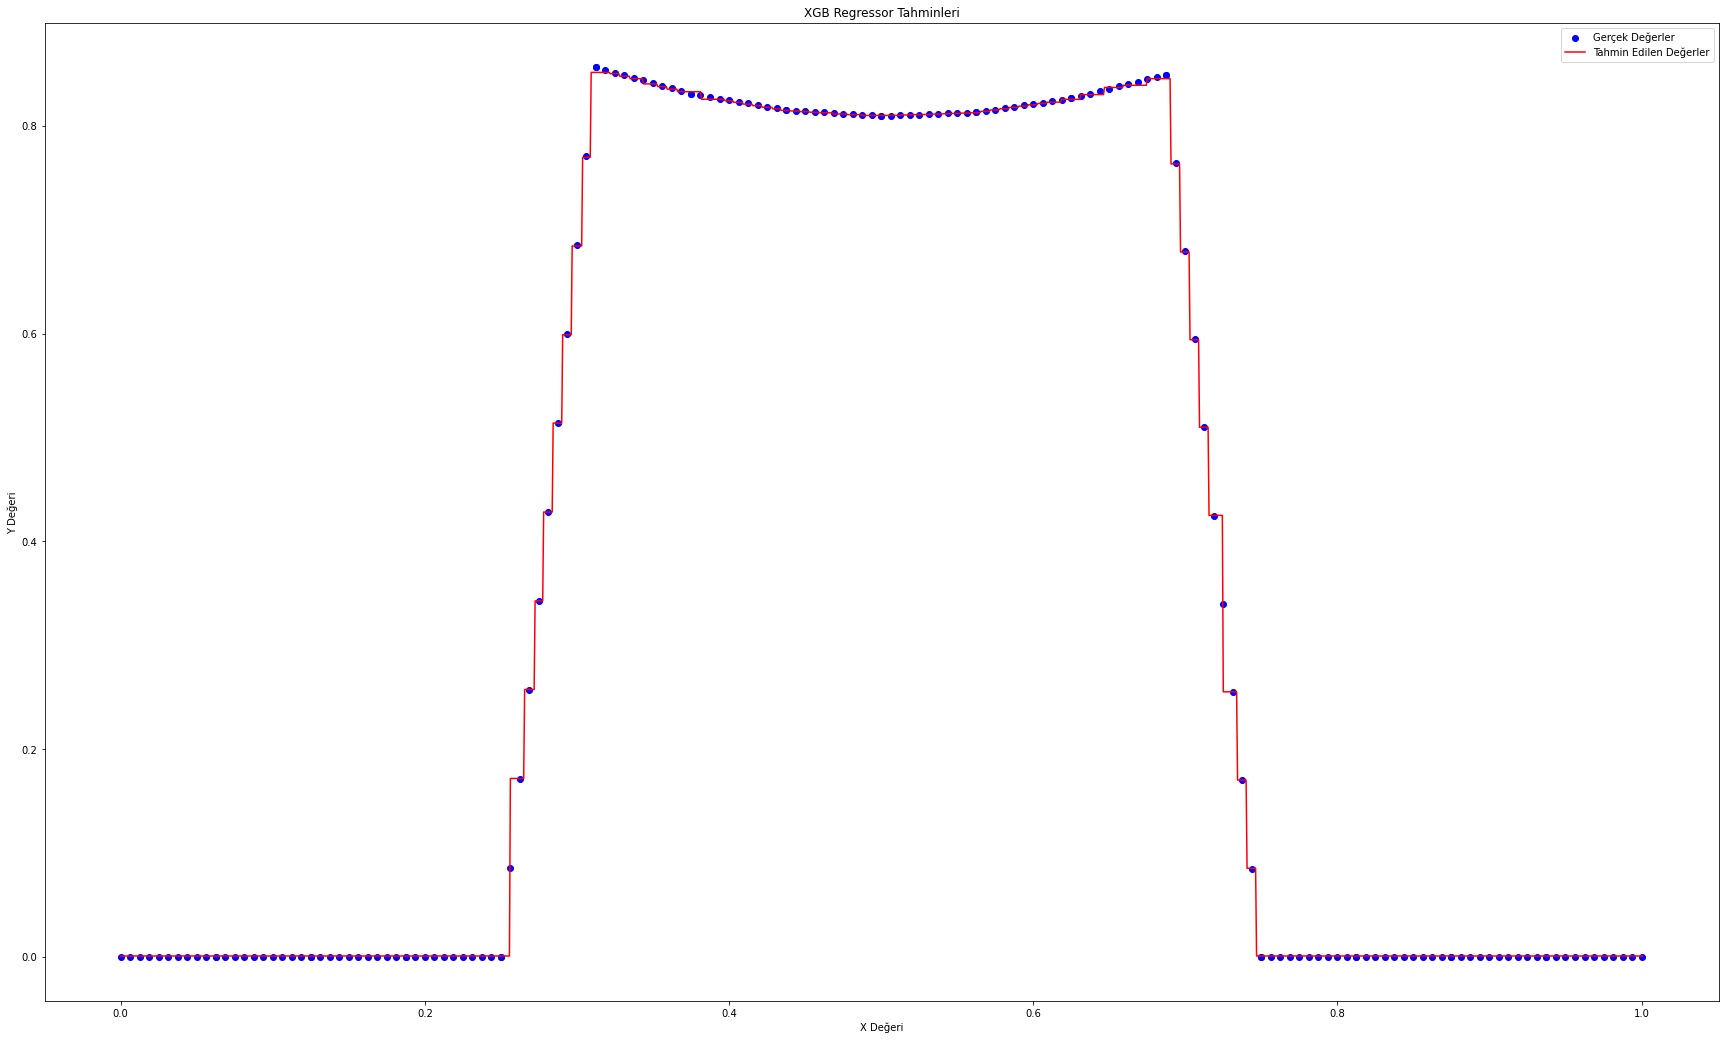

[0.82]


In [73]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=220,
                    learning_rate = 0.03,
                    max_depth = 7,
                    random_state=42,
                    n_jobs = -1,
                    reg_lambda=0.995,
                    )

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = xgb.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", xgb.score(X,y))


# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('XGB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=xgb, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()


### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.000625, 0.000625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = xgb.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = xgb.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('XGB Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(xgb.predict([[0.43125]])) #0.43125 == 8.171448e-01 gerçek değerde

### GradientBoostingRegressor deneyelim

[[0.   0.  ]
 [0.   0.09]
 [0.   0.  ]
 [0.   0.  ]
 [0.83 0.83]
 [0.   0.  ]
 [0.84 0.85]
 [0.   0.  ]
 [0.82 0.83]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.84 0.85]
 [0.   0.  ]
 [0.83 0.83]
 [0.83 0.83]
 [0.81 0.81]
 [0.   0.  ]
 [0.83 0.84]
 [0.   0.  ]
 [0.83 0.83]
 [0.84 0.84]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.84 0.84]
 [0.83 0.83]
 [0.81 0.81]
 [0.84 0.86]
 [0.   0.  ]
 [0.25 0.34]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.81 0.81]
 [0.   0.  ]
 [0.   0.  ]
 [0.82 0.83]
 [0.81 0.81]
 [0.83 0.83]]
0.9979196963925412
TEST SET
MAE:                 0.00262375080738041
RMSE:                0.009447049223151816
MAPE:                inf
r2:                  0.9994262936557987


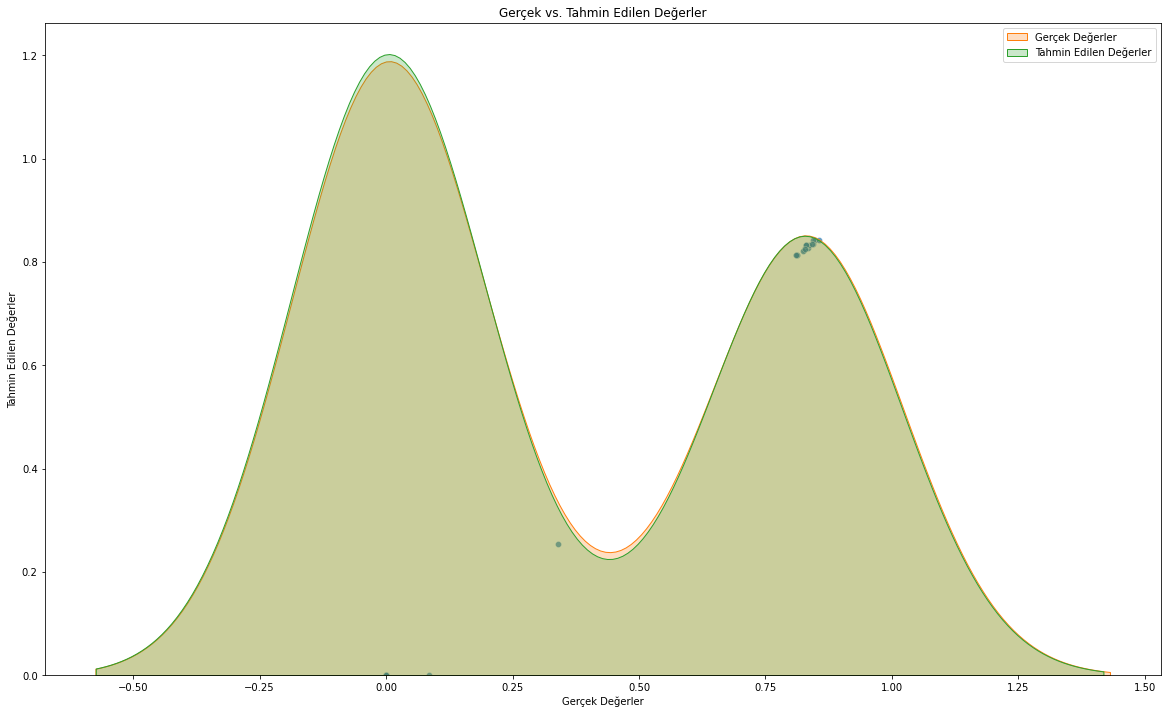

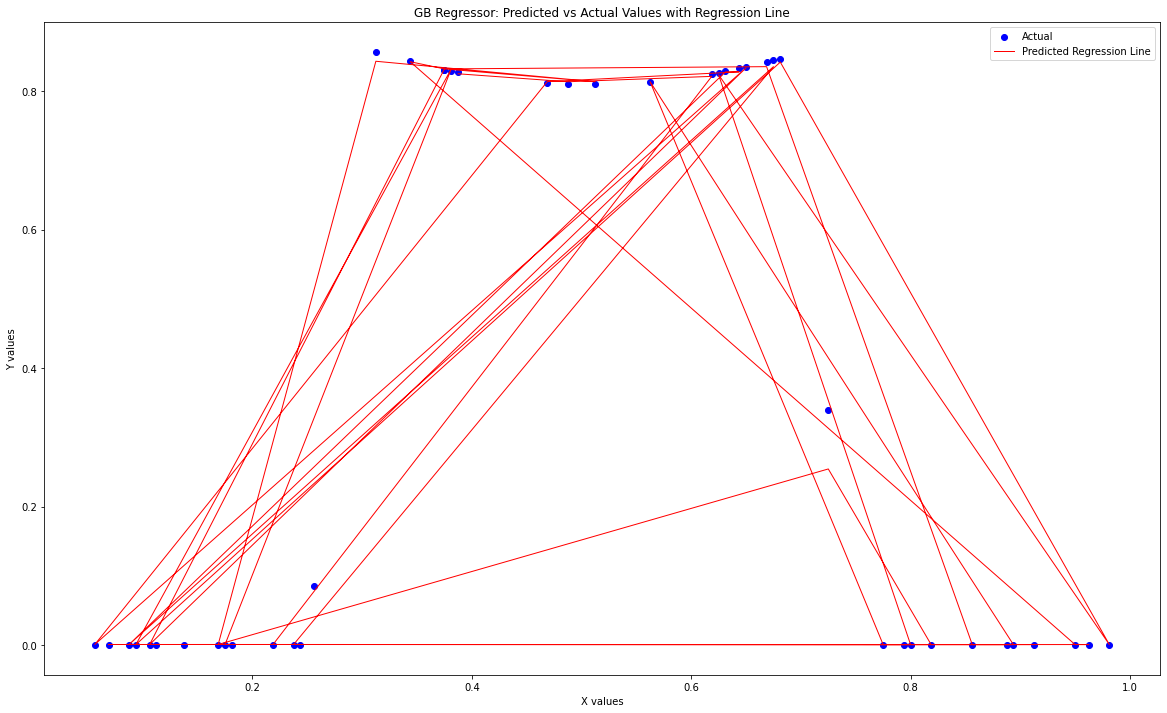

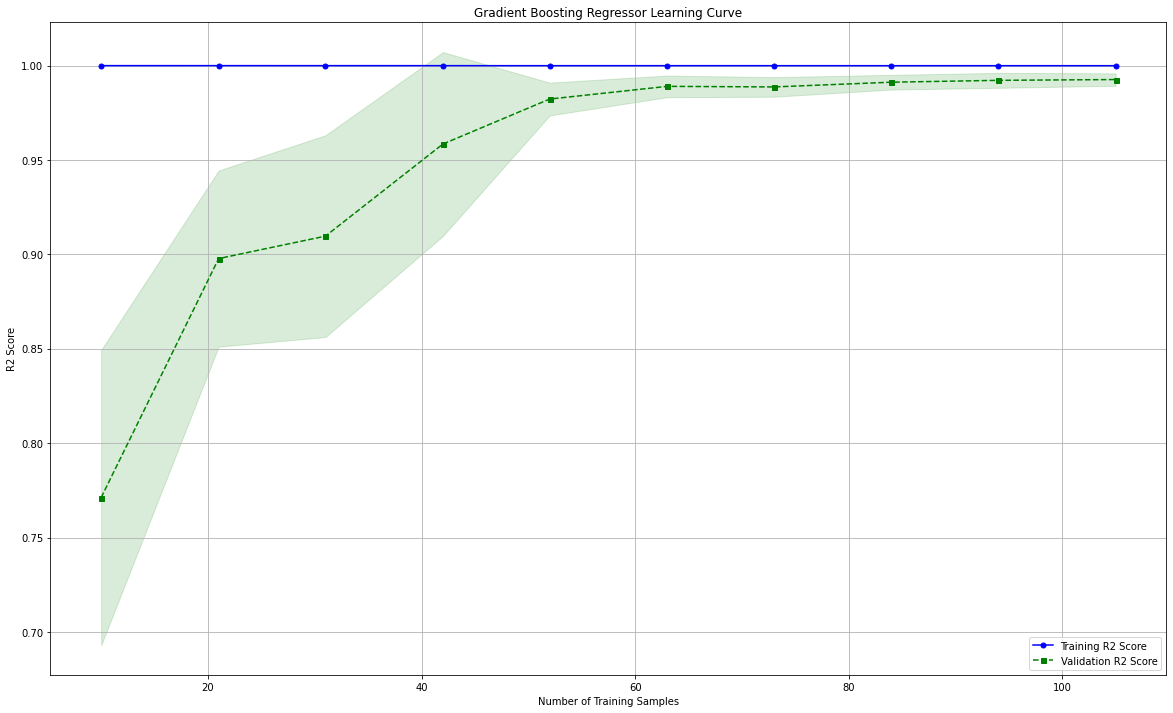

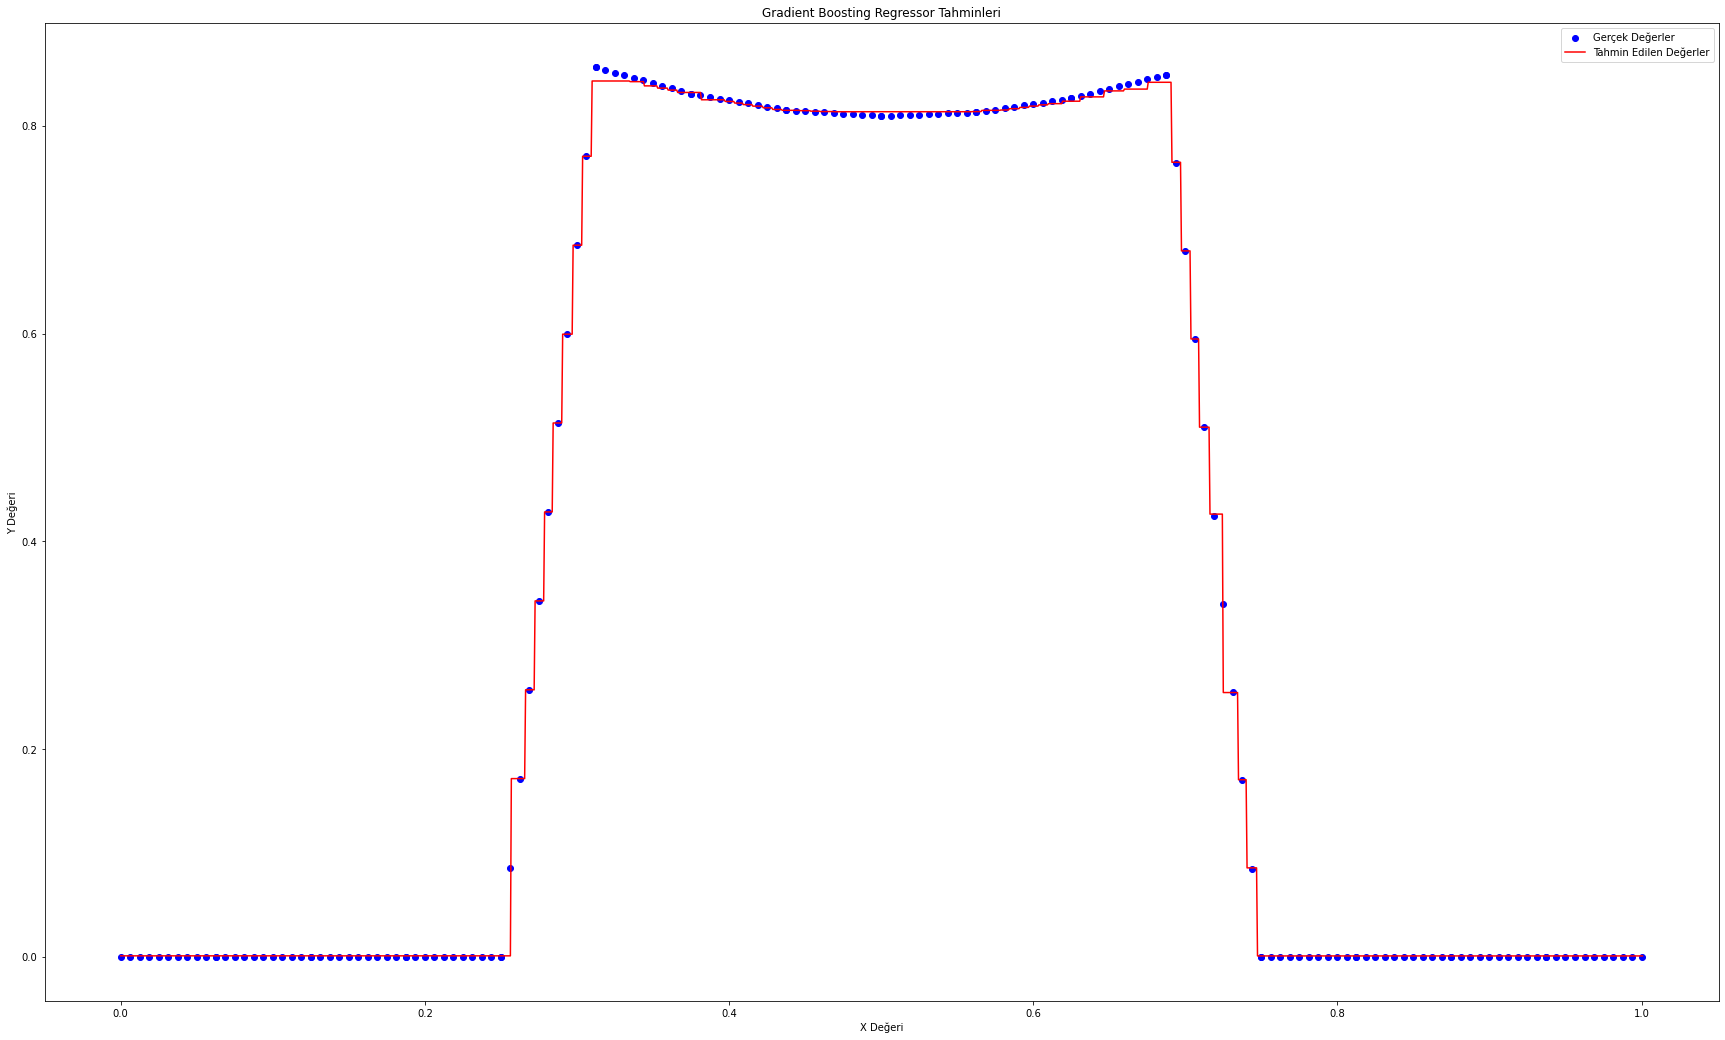

[0.82]


In [74]:
gb_reg = GradientBoostingRegressor(random_state=42,n_estimators=220,criterion='squared_error', learning_rate = 0.03)

gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = gb_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", gb_reg.score(X,y))


# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('GB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(estimator=gb_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Gradient Boosting Regressor Learning Curve')
plt.grid()
plt.show()


# Gradient Boosting Predict
### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.000625, 0.000625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = gb_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = gb_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Gradient Boosting Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(gb_reg.predict([[0.43125]])) #0.43125 == 8.171448e-01 gerçek değerde

### SupportVectorRegressor deneyelim

[[-0.06  0.  ]
 [ 0.32  0.09]
 [ 0.1   0.  ]
 [ 0.04  0.  ]
 [ 0.75  0.83]
 [-0.06  0.  ]
 [ 0.52  0.85]
 [ 0.03  0.  ]
 [ 0.7   0.83]
 [ 0.08  0.  ]
 [-0.04  0.  ]
 [-0.05  0.  ]
 [ 0.24  0.  ]
 [ 0.54  0.85]
 [-0.06  0.  ]
 [ 0.68  0.83]
 [ 0.65  0.83]
 [ 0.87  0.81]
 [-0.04  0.  ]
 [ 0.63  0.84]
 [-0.06  0.  ]
 [ 0.74  0.83]
 [ 0.65  0.84]
 [-0.02  0.  ]
 [-0.    0.  ]
 [-0.03  0.  ]
 [ 0.56  0.84]
 [ 0.74  0.83]
 [ 0.87  0.81]
 [ 0.54  0.86]
 [ 0.02  0.  ]
 [ 0.35  0.34]
 [ 0.03  0.  ]
 [ 0.05  0.  ]
 [-0.05  0.  ]
 [ 0.27  0.  ]
 [-0.06  0.  ]
 [ 0.16  0.  ]
 [ 0.83  0.81]
 [-0.06  0.  ]
 [ 0.17  0.  ]
 [ 0.72  0.83]
 [ 0.88  0.81]
 [ 0.76  0.83]]
0.8766867200458498
TEST SET
MAE:                 0.09446777500488007
RMSE:                0.12926894785783463
MAPE:                inf
r2:                  0.8925798575240869


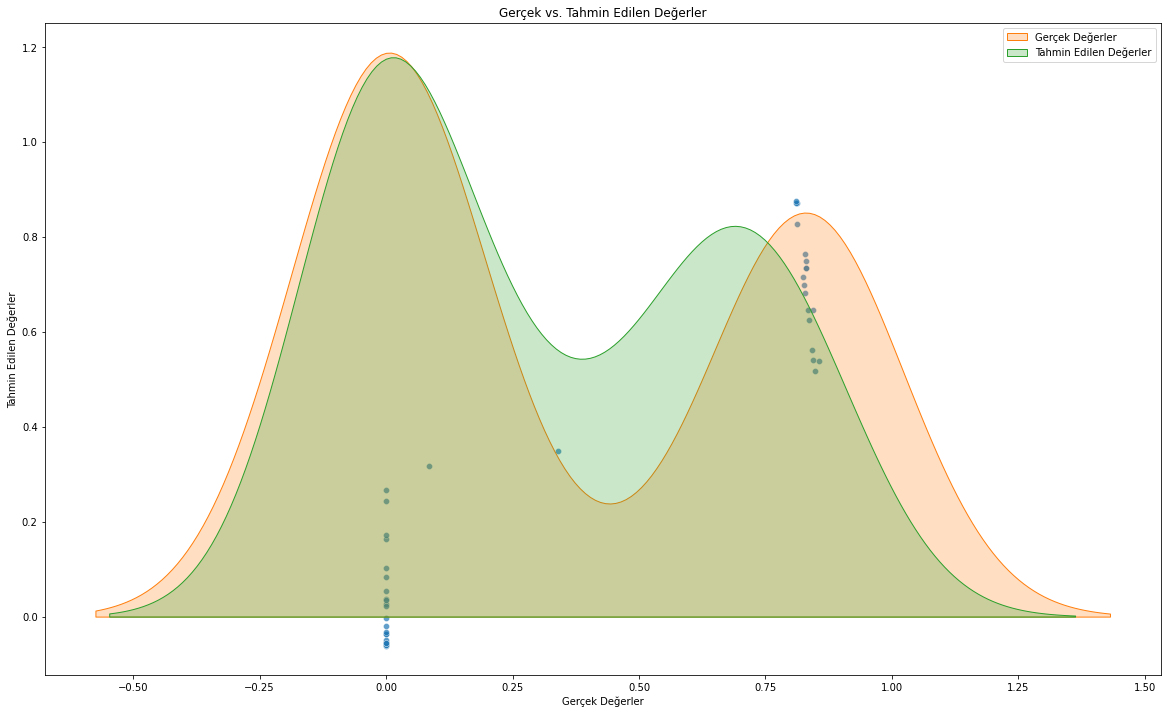

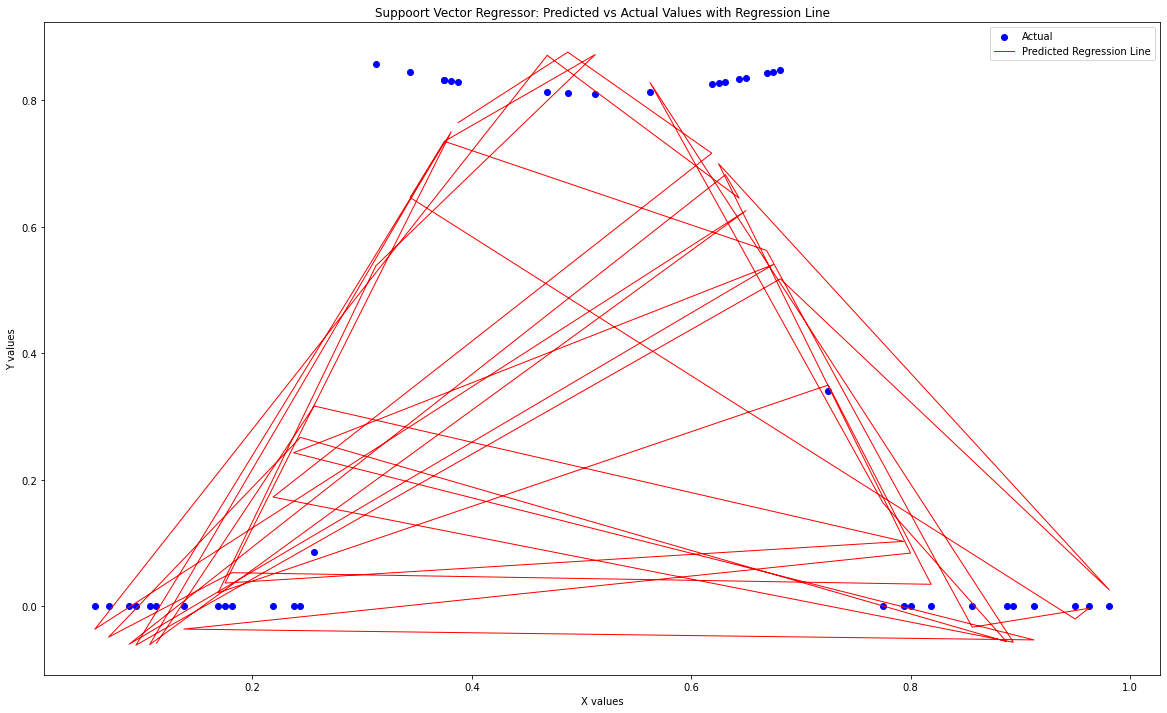

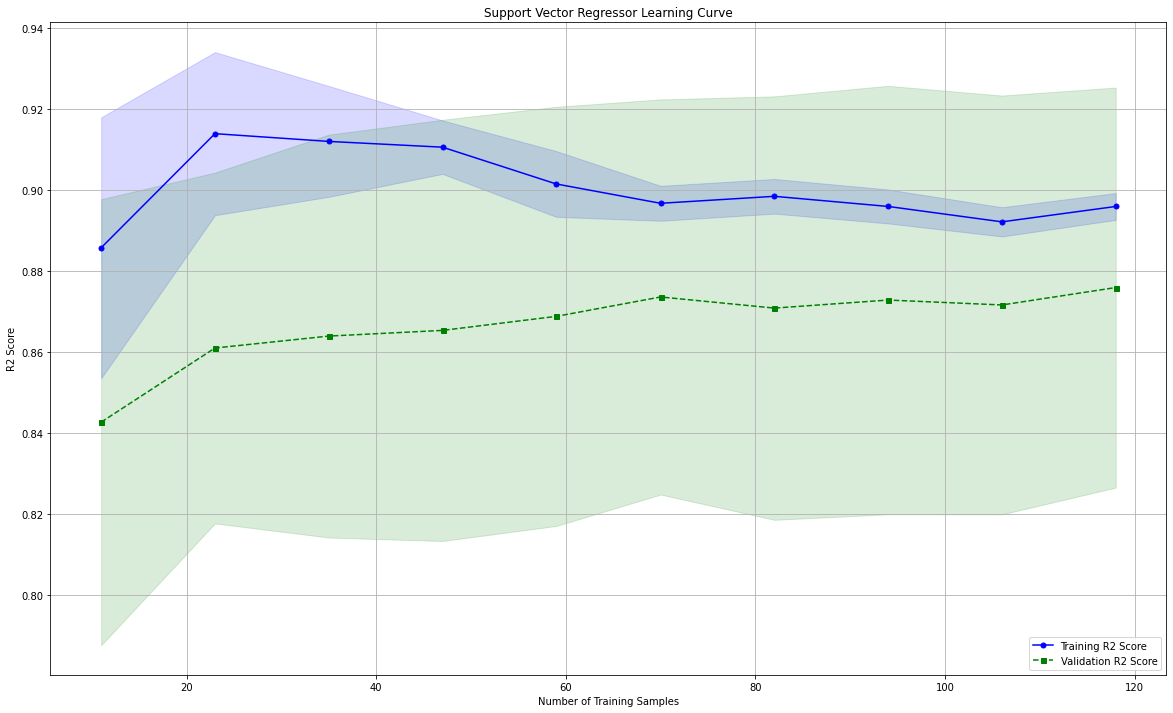

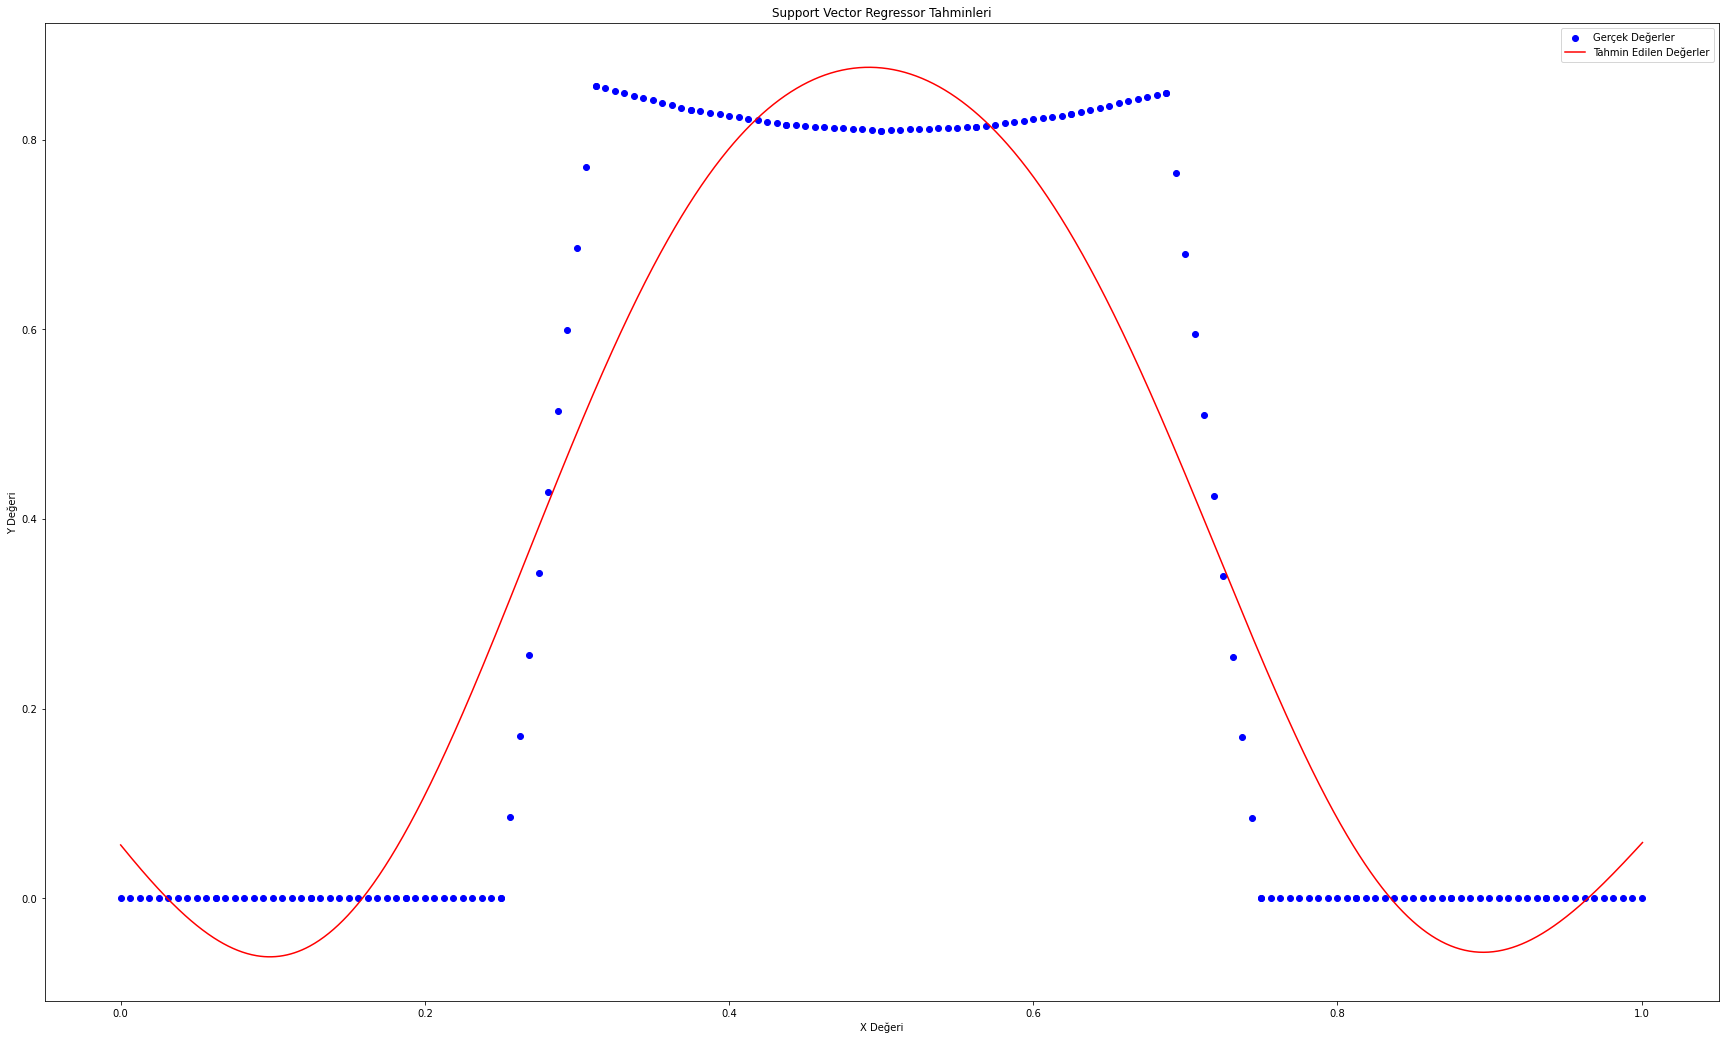

[0.84]


In [75]:
svr_reg = SVR(kernel = 'rbf', degree= 24, epsilon = 0.05)


svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))


# Use test and show results of test set
y_hat = svr_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", svr_reg.score(X,y))



# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Suppoort Vector Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()



train_sizes, train_scores, test_scores = learning_curve(estimator=svr_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Support Vector Regressor Learning Curve')
plt.grid()
plt.show()

#SVM RBF kernelli modelin predict sonuçları:
### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.000625, 0.000625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = svr_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = svr_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Support Vector Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(svr_reg.predict([[0.43125]])) #0.43125 == 8.171448e-01 gerçek değerde

### PolynomialRegressor ile deneyelim

R2 Score (Polynomial Regression):  0.8810906258449119
MAE (Polynomial Regression):  0.10996827631381728
RMSE (Polynomial Regression):  0.13922708731238795
MAPE (Polynomial Regression):  inf


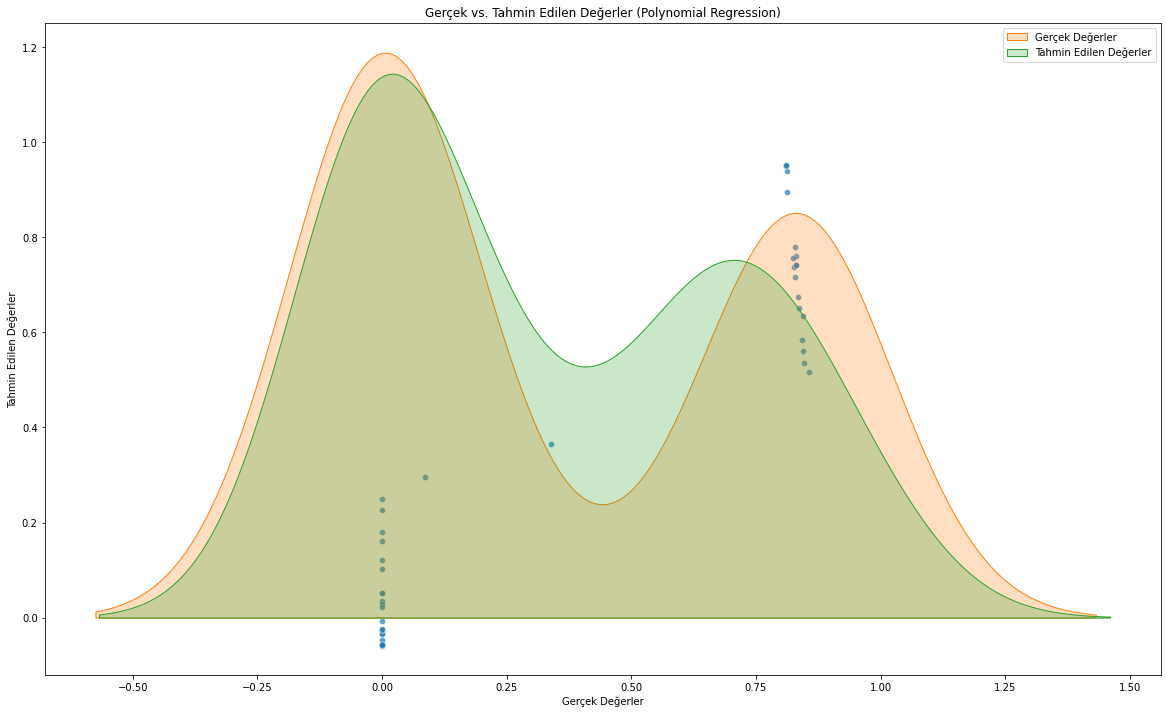

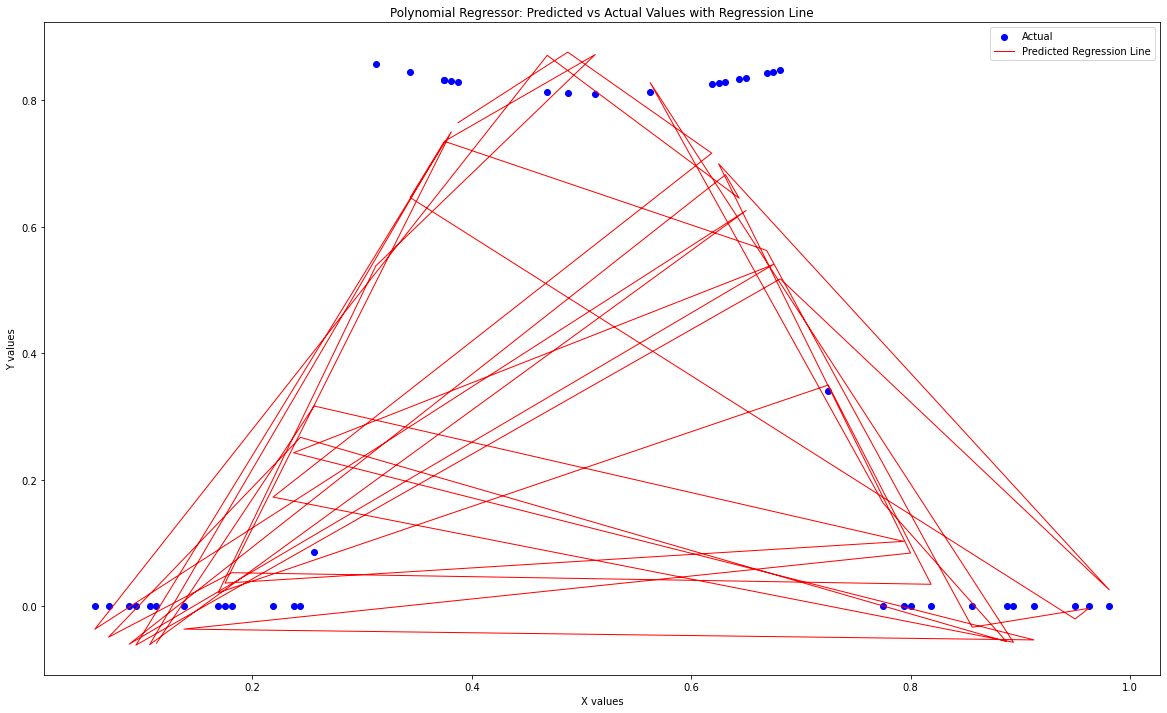

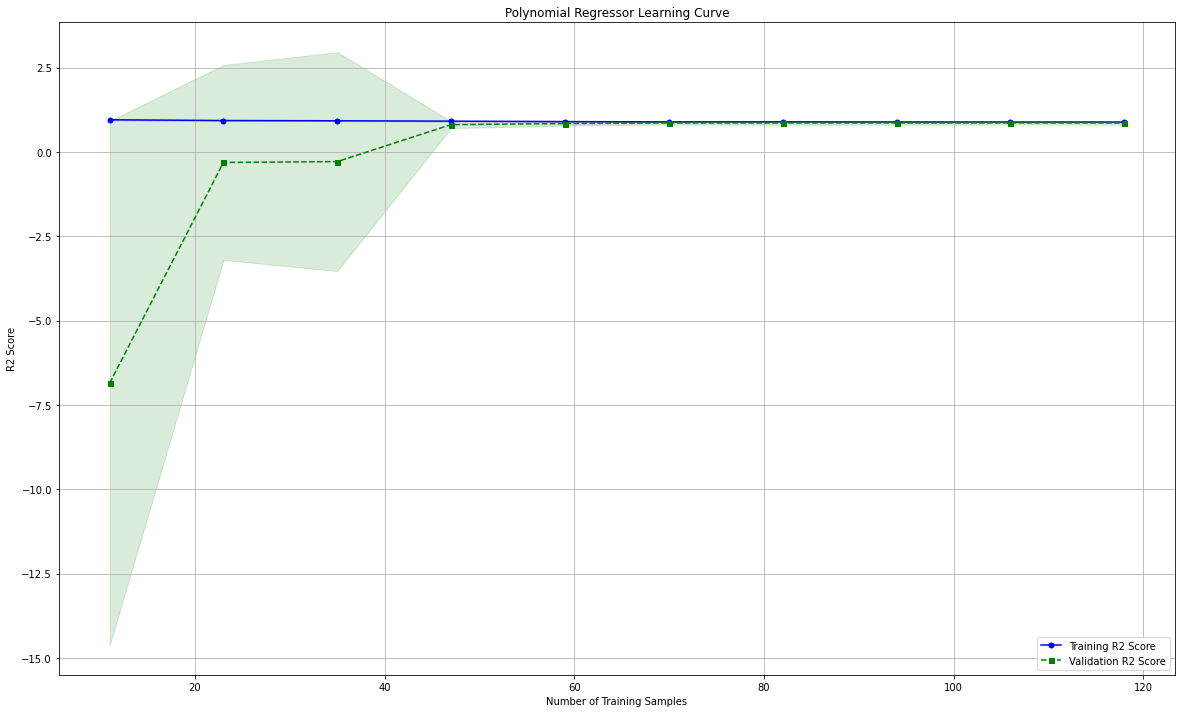

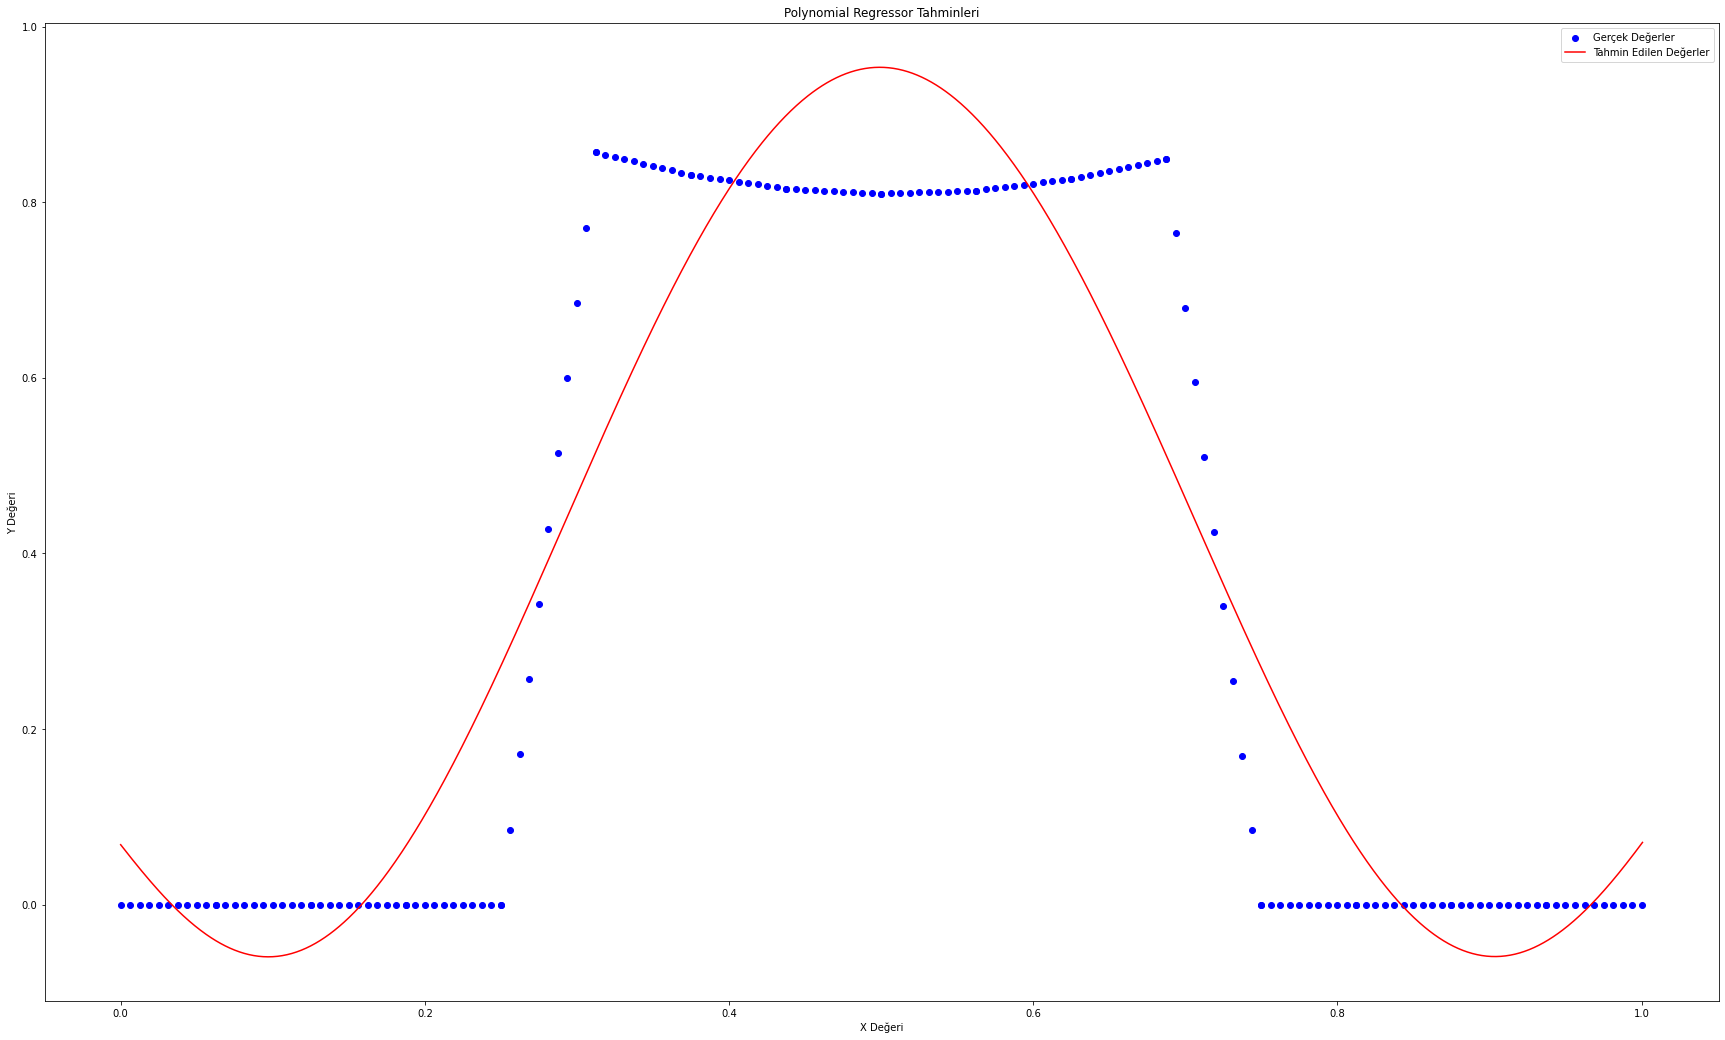

[0.89]


In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# PolynomialFeatures ile özellikleri genişletme
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

# Lineer Regresyon modeli oluşturma
poly_reg = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_reg.fit(X, y)

# Tahminler yapma
y_pred_poly = poly_reg.predict(X_test)

# Skorları ekrana yazdırma
print("R2 Score (Polynomial Regression): ", r2_score(y_test, y_pred_poly))
print("MAE (Polynomial Regression): ", metrics.mean_absolute_error(y_test, y_pred_poly))
print("RMSE (Polynomial Regression): ", math.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print("MAPE (Polynomial Regression): ", np.mean(np.abs((y_test - y_pred_poly) / y_test)) * 100)

# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df_poly = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred_poly})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df_poly, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler (Polynomial Regression)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show()


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Polynomial Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(estimator=poly_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Polynomial Regressor Learning Curve')
plt.grid()
plt.show()


# Polynomial Regression Predict Sonuçları:
### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.000625, 0.000625).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = poly_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = poly_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Polynomial Regressor Tahminleri')
plt.legend()
plt.show()

# manuel tek bir değerin predict edilebileceği kısım:
print(poly_reg.predict([[0.43125]])) #0.43125 == 8.171448e-01 gerçek değerde

### Multi-Layer Perceptron

In [77]:
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu', input_dim = 1))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=1, kernel_initializer='uniform', activation = 'linear'))

mlp.compile(optimizer = 'adam', loss =  'mean_squared_error' , metrics = ['mae'] )
mlp.fit(X_train, y_train,epochs=100, batch_size=32, validation_split=0.25)

y_pred = mlp.predict(X_test)




Epoch 1/100


4/4 [==============================] - 1s 51ms/step - loss: 0.2631 - mae: 0.3376 - val_loss: 0.3557 - val_mae: 0.4549
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2602 - mae: 0.3379 - val_loss: 0.3519 - val_mae: 0.4537
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2572 - mae: 0.3382 - val_loss: 0.3480 - val_mae: 0.4525
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2546 - mae: 0.3388 - val_loss: 0.3443 - val_mae: 0.4513
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2518 - mae: 0.3391 - val_loss: 0.3403 - val_mae: 0.4501
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2489 - mae: 0.3396 - val_loss: 0.3361 - val_mae: 0.4488
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2459 - mae: 0.3402 - val_loss: 0.3318 - val_mae: 0.4474
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.2426 - mae:

4/4 [==============================] - 0s 9ms/step - loss: 0.1502 - mae: 0.3767 - val_loss: 0.1633 - val_mae: 0.3895
Epoch 56/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1503 - mae: 0.3771 - val_loss: 0.1635 - val_mae: 0.3896
Epoch 57/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1502 - mae: 0.3770 - val_loss: 0.1631 - val_mae: 0.3895
Epoch 58/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1505 - mae: 0.3776 - val_loss: 0.1619 - val_mae: 0.3890
Epoch 59/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1507 - mae: 0.3786 - val_loss: 0.1613 - val_mae: 0.3887
Epoch 60/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1507 - mae: 0.3786 - val_loss: 0.1619 - val_mae: 0.3890
Epoch 61/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1505 - mae: 0.3781 - val_loss: 0.1628 - val_mae: 0.3894
Epoch 62/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1504 - mae: 0.3774 - val_l

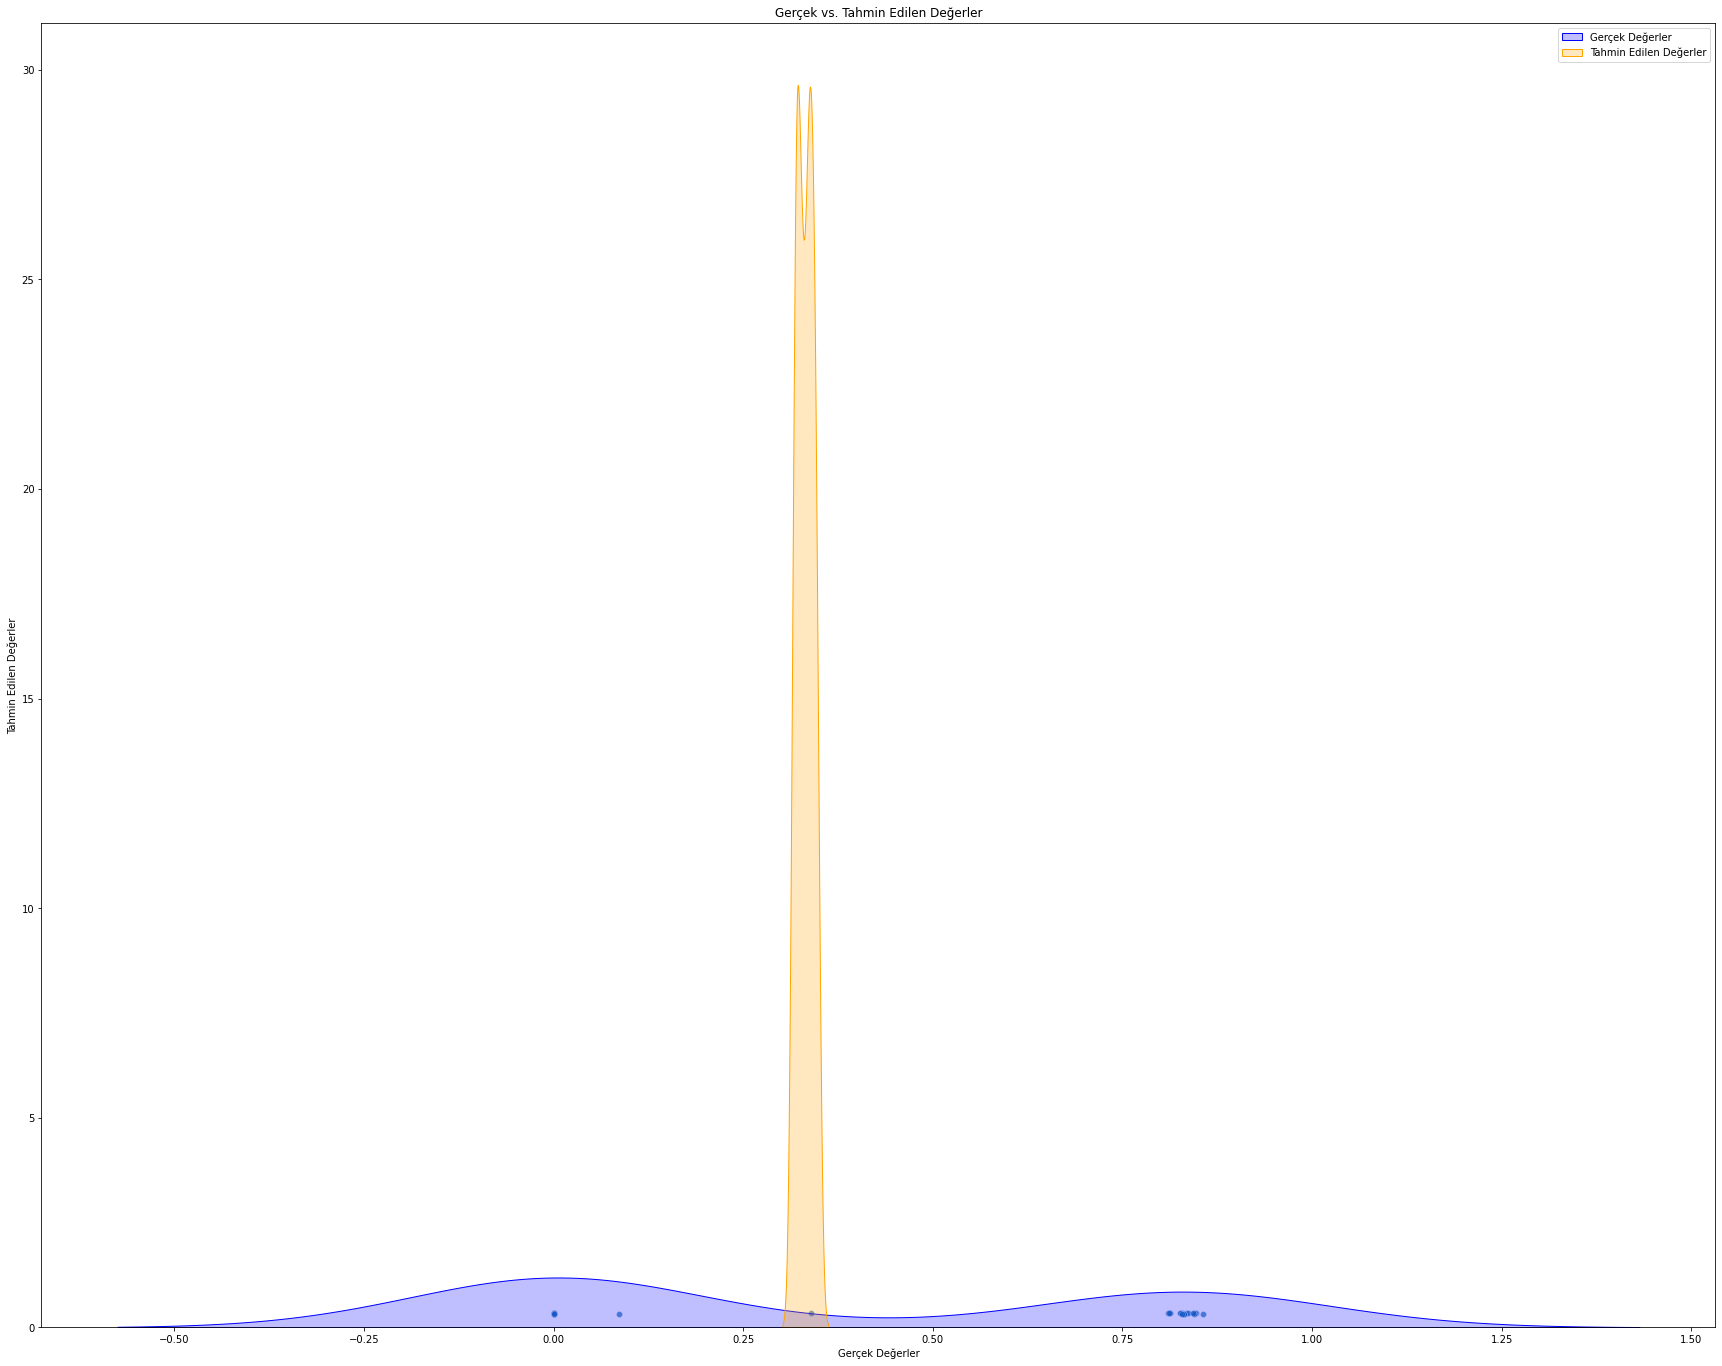

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# result_df isminde bir DataFrame oluşturulduğunu varsayalım
result_df = pd.DataFrame({'Gerçek Değerler': y_test.flatten(), 'Tahmin Edilen Değerler': y_pred.flatten()})

# Scatter plot ve yoğunluk grafiği çizimi
plt.figure(figsize=(30, 24))

# Scatter plot
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', color='blue', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', color='orange', shade=True)

plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()
plt.show()

Epoch 1/50
4/4 [==============================] - 0s 20ms/step - loss: 0.1489 - mae: 0.3704 - val_loss: 0.2026 - val_mae: 0.4443
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1489 - mae: 0.3705 - val_loss: 0.2023 - val_mae: 0.4441
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1489 - mae: 0.3706 - val_loss: 0.2017 - val_mae: 0.4435
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1489 - mae: 0.3709 - val_loss: 0.2008 - val_mae: 0.4428
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1489 - mae: 0.3709 - val_loss: 0.2007 - val_mae: 0.4426
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1489 - mae: 0.3711 - val_loss: 0.2001 - val_mae: 0.4421
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1489 - mae: 0.3712 - val_loss: 0.1995 - val_mae: 0.4416
Epoch 8/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1489 - mae: 0.3713 - val

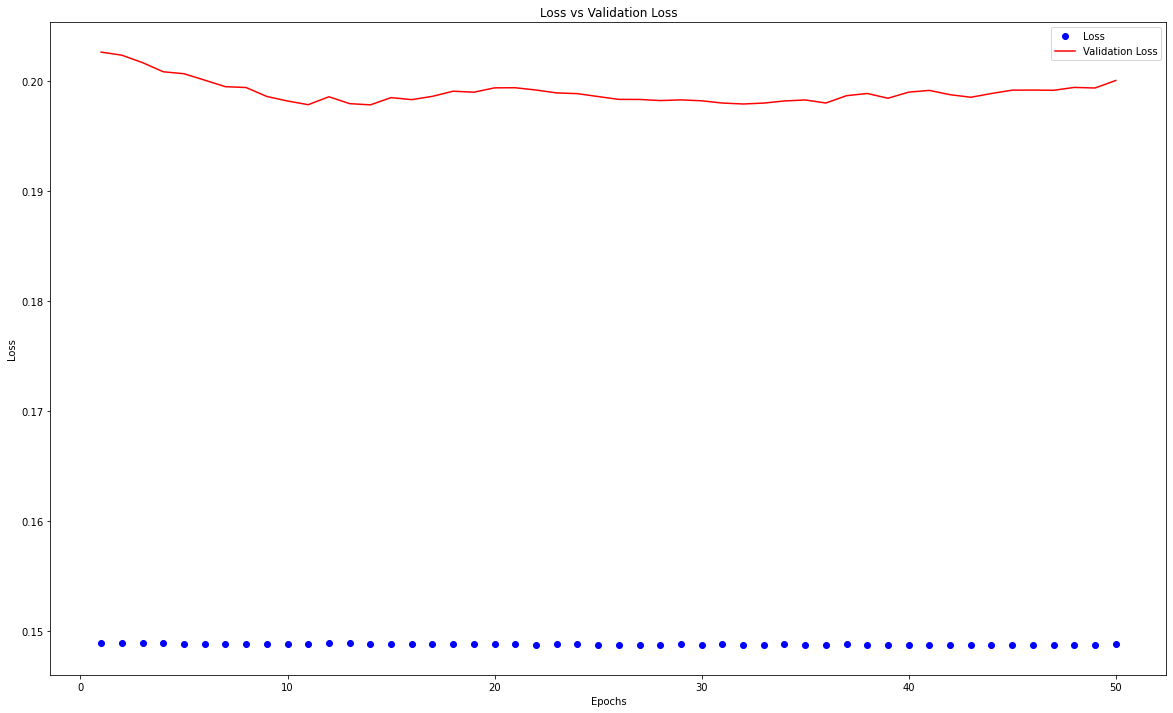

In [79]:
# Modelin eğitim sırasında kayıp (loss) ve doğrulama kaybı (validation loss) değerleri
history = mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Modelin eğitim sürecindeki kayıp (loss) değerleri
loss = history.history['loss']

# Modelin eğitim sürecindeki doğrulama kaybı (validation loss) değerleri
val_loss = history.history['val_loss']

# Eğitim ve doğrulama kaybı grafiği çizimi
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 12))

plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tüm modellerin grafiklerinin karşılaştırılması

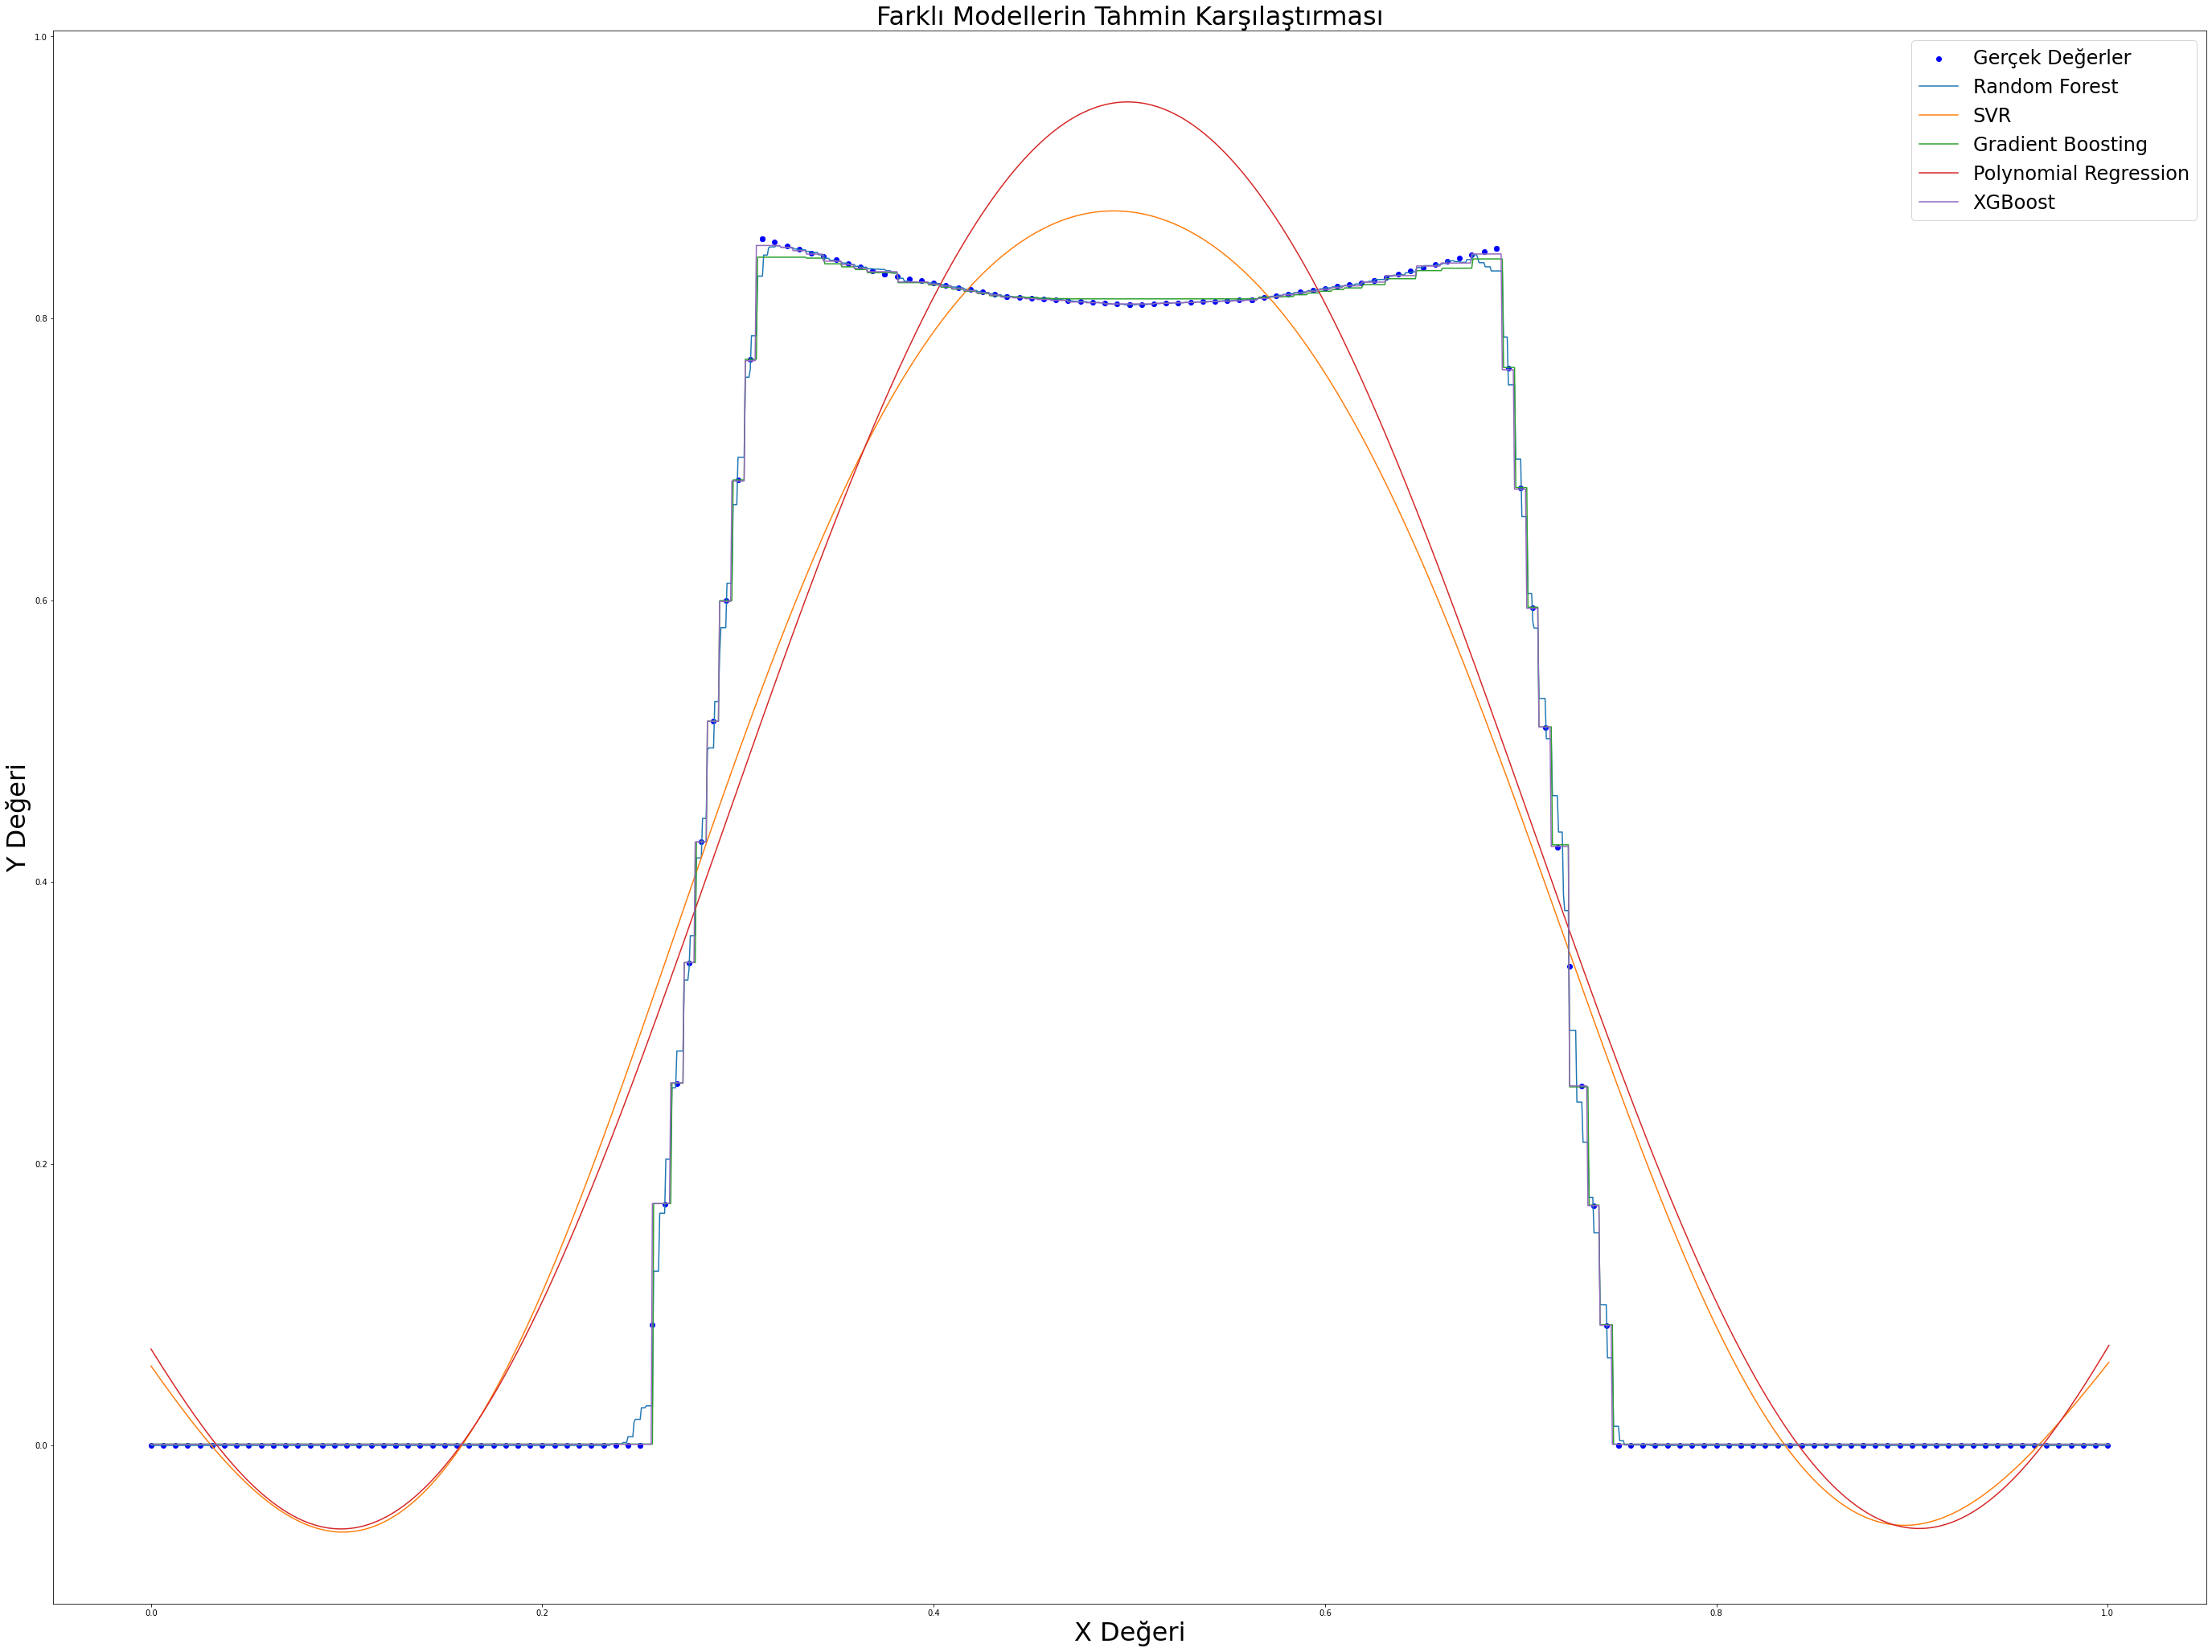

In [80]:
y_pred_rf = rf_reg.predict(X_values)
y_pred_svr = svr_reg.predict(X_values)  
y_pred_gb = gb_reg.predict(X_values)
y_pred_poly = poly_reg.predict(X_values)
y_pred_xgb = xgb.predict(X_values)

plt.figure(figsize=(48, 36))

# Gerçek değerler
plt.scatter(X, y, color='blue', label='Gerçek Değerler')

# Modellerin tahminleri
plt.plot(X_values, y_pred_rf, label='Random Forest')
plt.plot(X_values, y_pred_svr, label='SVR')
plt.plot(X_values, y_pred_gb, label='Gradient Boosting')
plt.plot(X_values, y_pred_poly, label='Polynomial Regression')
plt.plot(X_values, y_pred_xgb, label='XGBoost')

# Etiketler ve başlık
plt.xlabel('X Değeri',fontsize=32)
plt.ylabel('Y Değeri',fontsize=32)
plt.title('Farklı Modellerin Tahmin Karşılaştırması',fontsize=32)
plt.legend(fontsize=24)
plt.show()